# Курсовая работа
## Многослойные нейронные сети. Решение прикладных задач обработки данных на нейронных сетях.

Метрики в задачах машинного обучения: https://habr.com/ru/company/ods/blog/328372/

## Описание
> *Цель работы*: изучение математической модели многослойной нейронной сети, исследование методов оптимизации,и решение с помощью нейронной сети задачи классификации данных/регрессии.



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os

os.listdir()
os.chdir('/content/gdrive/MyDrive/Проекты/Нейронные сети/БДЗ')

In [3]:
!pip uninstall tensorflow
!pip install tensorflow==1.13.1
!pip install neupy

Found existing installation: tensorflow 1.13.1
Uninstalling tensorflow-1.13.1:
  Would remove:
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-1.13.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? н
Your response ('н') was not one of the expected responses: y, n
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.13.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-1.13.1-cp37-cp37m-manylinux1_x86_64.whl (92.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.7 requires tensorflow>=2.0.0, but you have tenso

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import neupy
from neupy import algorithms, layers
from neupy import utils, init
from neupy.layers.activations import Tanh

from neupy.layers import *

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


# import keras.backend as K
# import keras.models as M
# import keras.layers as L

# from sklearn.metrics import accuracy_score

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

## Подготовка к работе

### Исследование данных

In [4]:
os.listdir()

['Нейронные сети - ДЗ - варианты 2022.docx',
 'Нейронные сети - ДЗ 2022.docx',
 'winequality-red.csv',
 'winequality-white.csv',
 'winequality.names',
 'Отчет.БДЗ.docx',
 'Graphs',
 'BDZ(2).ipynb',
 'BDZ.ipynb']

In [5]:
df_white = pd.read_csv("winequality-white.csv", sep=';')

In [6]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [7]:
# размер датасета и количество признаков
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [8]:
# выходная переменная
df_white['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [9]:
# наличие пропусков
df_white.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# наличие повторов
df_white.duplicated(keep=False)

0        True
1        True
2        True
3        True
4        True
        ...  
4893    False
4894    False
4895    False
4896    False
4897    False
Length: 4898, dtype: bool

In [11]:
# def showGistogram(df, name):
#     plt.clf()
#     plt.figure(figsize = (16, 10))
    
#     data_size = df.shape[0]
#     k = round(1 + np.log2(data_size))
    
#     fontsize = 12
#     tick_labelsize = 8
        
#     for i in range(0, len(df.columns) - 1):
#         plt.subplot(3, 4, i + 1)
#         plt.title(df.columns[i], fontsize=fontsize)
#         plt.hist(df[df.columns[i]], k, edgecolor='black', linewidth=0.1)
#         plt.tick_params(labelsize=tick_labelsize) 
        
#     plt.tight_layout()
#     plt.savefig(f"./Graphs/Data/{name}.jpg")
#     plt.show()
    
# showGistogram(df_white, name='Distribution')

In [12]:
# def showBox(df, name):
#     plt.clf()
#     plt.figure(figsize = (16, 10))
    
#     fontsize = 12
#     tick_labelsize = 8
    
#     for i in range(0, len(df.columns) - 1):
#         plt.subplot(3, 4, i + 1)
#         plt.title(df.columns[i], fontsize=fontsize)
#         plt.boxplot(df[df.columns[i]])
#         plt.tick_params(labelsize=tick_labelsize) 

#     plt.tight_layout()
#     plt.savefig(f"./Graphs/Data/{name}.jpg", bbox_inches='tight')           
#     plt.show()
    
# showBox(df_white, name='BoxAndWHhisker')

In [13]:
# plt.clf()
# fig, axes = plt.subplots(figsize=(10, 8))

# tick_labelsize= 10

# cols = list(df_white.columns)
# cols.pop(len(cols)-1)
# hm = sns.heatmap(df_white[cols].corr(), cbar=True, annot=True)

# plt.tick_params(labelsize=tick_labelsize) 

# fig.tight_layout()
# plt.savefig(f"./Graphs/Data/Correlation.jpg")

# plt.show()

In [14]:
# def showScatters(df, name):
#     plt.clf()
#     plt.figure(figsize = (10, 10))

#     tick_labelsize= 10

#     plt.subplot(2, 2, 1)
#     plt.xlabel('fixed acidity')
#     plt.ylabel('volatile acidity')
#     plt.scatter(df['fixed acidity'], df['volatile acidity'])

#     plt.subplot(2, 2, 2)
#     plt.xlabel('chlorides')
#     plt.ylabel('alcohol')
#     plt.scatter(df['chlorides'], df['alcohol'])
    
#     plt.subplot(2, 2, 3)
#     plt.xlabel('citric acid')
#     plt.ylabel('chlorides')
#     plt.scatter(df['citric acid'], df['chlorides'])

#     plt.subplot(2, 2, 4)
#     plt.xlabel('volatile acidity')
#     plt.ylabel('alcohol')
#     plt.scatter(df['volatile acidity'], df['alcohol'])

#     plt.tick_params(labelsize=tick_labelsize) 
    
#     plt.tight_layout()
    
#     plt.savefig(f"./Graphs/Data/{name}.jpg", bbox_inches='tight')

#     plt.show()
    
    
# showScatters(df_white, name='Scattering')

In [15]:
# plt.clf()

# sns.pairplot(df_white)

# plt.tight_layout()

# plt.savefig(f"./Graphs/Data/Scattering_full.jpg", bbox_inches='tight')

### Обработка данных

#### 1. Удаление дупликатов

In [16]:
df_white.shape

(4898, 12)

In [17]:
df_white = df_white.drop_duplicates(keep='first')

In [18]:
df_white.shape

(3961, 12)

#### 2. Удаление выбросов

In [19]:
low = .25
high = .75

filt_df = df_white

In [20]:
# chlorides
# volatile acidity
# sulphates

quant_low  = filt_df.quantile(low, axis=0)
quant_high = filt_df.quantile(high, axis=0)

interquartile_range = (quant_high - quant_low) * 1.5

print(interquartile_range)

fixed acidity            1.500000
volatile acidity         0.180000
citric acid              0.180000
residual sugar          10.950000
chlorides                0.022500
free sulfur dioxide     33.000000
total sulfur dioxide    90.000000
density                  0.006135
pH                       0.300000
sulphates                0.210000
alcohol                  2.850000
quality                  1.500000
dtype: float64


In [21]:
min_val = quant_low - interquartile_range
max_val = quant_high + interquartile_range

# print(min_val.keys())

for key in min_val.keys():
  filt_df = filt_df.loc[(filt_df[key] >= min_val[key]) & (filt_df[key] <= max_val[key])]

filt_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.99380,3.22,0.45,11.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [22]:
filt_df.shape

(3131, 12)

In [23]:
# showGistogram(filt_df, name='Distribution_filtered')
# showBox(filt_df, name='BoxAndWHhisker_filtered')
# showScatters(filt_df, name='Scattering_filtered')

In [24]:
# plt.clf()

# sns.pairplot(filt_df)

# plt.tight_layout()

# plt.savefig(f"./Graphs/Data/Scattering_full_filtered.jpg", bbox_inches='tight')

### Предобработка данных

In [25]:
filt_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.99380,3.22,0.45,11.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [26]:
#standarting values
scaler = StandardScaler()

data_values_ = filt_df.values
data_values = data_values_[:,0:-1]
data_values = scaler.fit_transform(data_values)

data_values_[:,0:-1] = data_values
filt_df_standard = pd.DataFrame(data_values_)
filt_df_standard.columns = filt_df.columns

# filt_df_standard[filt_df_standard.columns[1:]] = filt_df_standard[filt_df_standard.columns[1:]].apply(pd.to_numeric)
filt_df_standard

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.662050,0.439364,0.173420,-0.913910,0.688646,-1.341228,-0.098834,0.126546,0.752250,0.072148,-0.961409,6.0
1,1.721938,0.183191,0.864232,0.226149,0.789655,-0.283623,-0.937872,0.526635,0.465413,-0.438464,-0.449419,6.0
2,0.529944,-0.457241,-0.056851,0.570318,1.597731,0.840082,1.195682,0.708494,-0.036553,-0.846953,-0.620082,6.0
3,-0.794493,0.695536,-1.899015,0.247660,0.284607,-0.283623,-0.002944,0.453892,-0.108263,-0.132097,-0.876077,6.0
4,1.721938,-0.585327,1.209637,-0.935421,0.183598,-0.415824,-0.170752,0.053803,0.178575,-0.336342,0.318566,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3126,-0.794493,-0.713414,-0.402256,-0.913910,-0.321450,-0.680225,-1.057735,-0.913685,0.537122,0.174270,0.489229,6.0
3127,-0.264718,0.695536,0.403690,0.462766,0.486626,1.501084,0.764177,0.453892,-0.323391,-0.234219,-0.876077,5.0
3128,-0.397162,-0.329155,-1.553609,-0.999953,-0.119431,-0.283623,-0.602257,-0.404481,-1.470742,-0.234219,-1.046741,6.0
3129,-1.721600,0.311277,-0.287121,-1.021463,-2.038611,-0.944626,-0.626229,-1.804793,1.039088,-1.051198,1.854536,7.0


In [27]:
# showGistogram(filt_df_standard, name='Distribution_filt_standard')
# showBox(filt_df_standard, name='BoxAndWHhisker_filt_standard')
# showScatters(filt_df_standard, name='Scattering_filt_standard')

In [28]:
# plt.clf()

# sns.pairplot(filt_df_standard)

# plt.tight_layout()

# plt.savefig(f"./Graphs/Data/Scattering_full_filt_standard.jpg", bbox_inches='tight')

### Формирование признаков

#### 1. Уменьшение размерности

In [67]:
# filt_df_standard

In [68]:
X = filt_df_standard.loc[:, filt_df_standard.columns != 'quality']
Y = filt_df_standard['quality']

In [69]:
pca = PCA(n_components = 9)
data_pca = pca.fit_transform(X)
data_df = pd.DataFrame(data_pca, columns=[f'PC{x}' for x in range(1, 10)])
data_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.208509,-0.785119,-0.294362,1.427314,0.626359,1.057534,0.063062,-0.407615,0.885382
1,0.531556,1.325976,-0.298482,1.065508,0.161394,1.029909,-0.293773,0.861061,-0.424255
2,2.117130,0.125086,0.007859,0.180014,-0.812351,0.582131,1.059321,0.303383,-0.502725
3,0.489866,-1.254429,1.477068,1.026799,0.067595,-0.721017,0.382937,-0.204694,0.417772
4,-0.399849,1.626484,-1.138901,0.278896,0.042510,0.902749,0.259999,0.990812,0.015212


In [70]:
# data_df['target'] = Y
# data_df

<Figure size 432x288 with 0 Axes>

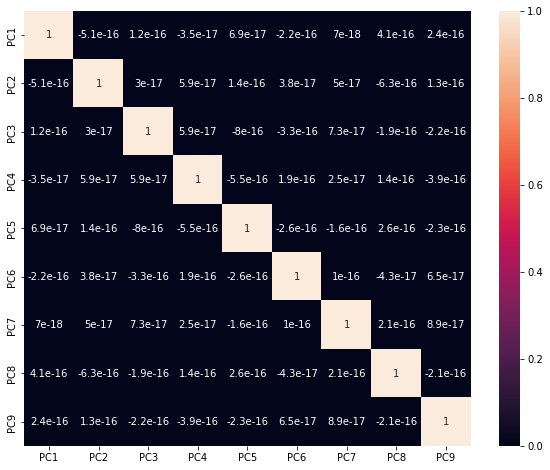

In [71]:
plt.clf()
fig, axes = plt.subplots(figsize=(10, 8))

tick_labelsize= 10

cols = list(data_df.columns)
hm = sns.heatmap(data_df[cols].corr(), cbar=True, annot=True)

#### 2. Разделение данных



In [72]:
samples_count = data_df.shape[0]

In [73]:
# валидационная доля от тренеровачных данных
val_part = (samples_count * 0.3 ) / (samples_count * 0.9)
val_part

0.3333333333333333

In [74]:
x_train, x_test, y_train, y_test = train_test_split(data_df, Y, test_size=0.1)

In [75]:
print('Тренировачная выборка:\n', y_train.value_counts())
print('='*100)
print('Тестовая выборка:\n', y_test.value_counts())

Тренировачная выборка:
 6.0    1366
5.0     815
7.0     562
4.0      74
Name: quality, dtype: int64
Тестовая выборка:
 6.0    161
5.0     79
7.0     64
4.0     10
Name: quality, dtype: int64


In [76]:
print('Тренировачная выборка:\n', y_train.shape[0] * (1 - val_part))
print('='*100)
print('Валидационная выборка:\n', y_train.shape[0] * val_part)
print('='*100)
print('Тестовая выборка:\n', y_test.shape[0])

Тренировачная выборка:
 1878.0000000000002
Валидационная выборка:
 939.0
Тестовая выборка:
 314


In [77]:
y_train.shape[0] * (1 - val_part) + y_train.shape[0] * val_part + y_test.shape[0]

3131.0

In [79]:
x_train.shape

(2817, 9)

## Ход работы

### Многослойная сеть

In [80]:
x_train = np.asarray(x_train).astype('float32').reshape((-1, 9))
y_train = to_categorical(y_train, 11)

x_test = np.asarray(x_test).astype('float32').reshape((-1, 9))
y_test = to_categorical(y_test, 11)

In [ ]:
def weights_speed(epochs, model, loss_fn):
    weights_1 = []
    weights_2 = []
    weights_3 = []
    weights_4 = []

    gradients = []
    all_weights = []

    loss_values = []
    val_loss_values = []

    for epoch in range(epochs):
        print("Start of epoch %d" % (epoch,))

        all_weights.append([])

        # Iterate over the batches of the dataset.   
        for step, (x_batch_train, y_batch_train) in enumerate(zip(x_train_batches, y_train_batches)):
            weights_1.append(model.layers[1].get_weights())
            weights_2.append(model.layers[2].get_weights())
            weights_3.append(model.layers[3].get_weights())
            weights_4.append(model.layers[4].get_weights())

            for i in range(1, 5):
                all_weights[epoch].append(model.layers[i].get_weights())

            with tf.GradientTape() as tape:
                logits = model(tf.constant(x_batch_train, shape=(len(x_batch_train),11)))
                loss_value = loss_fn(y_batch_train, logits)

            grads = tape.gradient(loss_value, model.trainable_weights)
            optimizer.apply_gradients(zip(grads, model.trainable_weights))
            loss_values.append(loss_value)
            gradients.append(grads)

        # Run a validation loop at the end of each epoch.
        val_logits = model(x_val, training=False)
        loss_value_valid = loss_fn(y_val, val_logits)
        val_loss_values.append(loss_value_valid)
    #     print("Time taken: %.2fs" % (time.time() - start_time))

    avg_global_speeds = list()
    max_global_speeds = list()
    min_global_speeds = list()
    for epoch in range(epochs-1): 
        avg_speeds = list()
        max_speeds = list()
        min_speeds = list()

        for layer in range(5): 
            try:
                speed = (all_weights[epoch+1][layer][0] - all_weights[epoch][layer][0])/gradients[epoch][layer*2][0]
            except Exception as ex:
                print('--------------------------------------')  
#                 print(f'layer = {layer}, i = {epoch}')
#                 print('--------------------------------------')
#                 print(len(all_weights[epoch+1][layer][0]))
#                 print(len(all_weights[epoch][layer][0]))
#                 print('--------------------------------------')
#                 print(all_weights[epoch+1][layer][0])
#                 print('--------------------------------------')
#                 print(all_weights[epoch][layer][0])
#                 print('--------------------------------------')
#                 print(gradients[epoch][layer])
#                 print('--------------------------------------')
#                 print(ex)
            avg_speeds.append(tf.get_static_value(tf.reduce_mean(tf.reduce_mean(tf.abs(speed), axis = 0), axis = 0)))
            max_speeds.append(tf.get_static_value(tf.math.reduce_max(tf.math.reduce_max(tf.abs(speed), axis =0), axis = 0)))
            min_speeds.append(tf.get_static_value(tf.math.reduce_min(tf.math.reduce_max(tf.abs(speed), axis =0), axis = 0)))
        avg_global_speeds.append(sum(avg_speeds)/ len(avg_speeds))
        max_global_speeds.append(max(max_speeds))
        min_global_speeds.append(min(min_speeds))

    speeds_0 = list()
    for i in range(epochs-1): 
        speeds_0.append(tf.get_static_value(tf.abs((weights_1[i+1][0][0][0] - weights_1[i][0][0][0])/gradients[i][2][0][0])))

    speeds_1 = list()
    for i in range(epochs-1): 
        speeds_1.append(tf.get_static_value(tf.abs((weights_2[i+1][0][0][0] - weights_2[i][0][0][0])/gradients[i][2][0][0])))

    speeds_2 = list()
    for i in range(epochs-1): 
        speeds_2.append(tf.get_static_value(tf.abs((weights_3[i+1][0][0][0] - weights_3[i][0][0][0])/gradients[i][2][0][0])))

    speeds_3 = list()
    for i in range(epochs-1): 
        speeds_3.append(tf.get_static_value(tf.abs((weights_4[i+1][0][0][0] - weights_4[i][0][0][0])/gradients[i][2][0][0])))
        
    return [speeds_0, speeds_1, speeds_2, speeds_3, max_global_speeds, min_global_speeds, avg_global_speeds]


In [88]:
def build_model(optimizer, kernel_initializer, bias_initializer):

    # инициализация модели
    input1 = layers.Input(shape=(9,))

    # скрытый слой
    x1 = layers.Dense(
        20,
        activation='tanh',
        kernel_initializer=kernel_initializer,
        bias_initializer  =bias_initializer)(input1)

    # скрытый слой
    x2 = layers.Dense(
        10,
        activation='tanh',
        kernel_initializer=kernel_initializer,
        bias_initializer  =bias_initializer)(x1)

    # скрытый слой
    x3 = layers.Dense(
        10,
        activation='tanh',
        kernel_initializer=kernel_initializer,
        bias_initializer  =bias_initializer)(x2)


    # выходной слой
    out_x = layers.Dense(
        11,
        activation=tf.keras.activations.softmax,
        kernel_initializer=kernel_initializer,
        bias_initializer  =bias_initializer)(x3)


    # Соберем полную модель сети от входа к выходу
    model1 = Model(inputs=input1, outputs=out_x)


    # Компиляция модели
    model1.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=tf.keras.metrics.MeanAbsoluteError())

    return model1

### GD

In [93]:
# # метод оптимизации
# optimizer1 = tf.keras.optimizers.SGD(learning_rate=0.0001)
# optimizer2 = tf.keras.optimizers.SGD(learning_rate=0.001)
# optimizer3 = tf.keras.optimizers.SGD(learning_rate=0.01)
# optimizer4 = tf.keras.optimizers.SGD(learning_rate=0.1)
# optimizer5 = tf.keras.optimizers.SGD(learning_rate=1)

# optimizers = [optimizer1, optimizer2, optimizer3, optimizer4, optimizer5]

In [94]:
# kernel_initializer = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer   = tf.keras.initializers.GlorotUniform(seed=0)

# errors1  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model1 = build_model(optimizer1, kernel_initializer, bias_initializer)

# val_cce = 1000
# epochs = 0

# while epochs < 100 or val_cce > 1.095:
    
#     hist1 = model1.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors1['epochs'].append(epochs)
    
#     errors1['train']. append(hist1.history['loss'][0])
#     errors1['val'].   append(hist1.history['val_loss'][0])
#     errors1['test'].  append(model1.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist1.history['val_loss'][0] < val_cce:
#         val_cce = hist1.history['val_loss'][0]

In [96]:
# kernel_initializer = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer   = tf.keras.initializers.GlorotUniform(seed=0)

# errors2  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model2 = build_model(optimizer2, kernel_initializer, bias_initializer)

# val_cce = 1000
# epochs = 0

# while epochs < 100 or val_cce > 1.05:
    
#     hist2 = model2.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors2['epochs'].append(epochs)
    
#     errors2['train']. append(hist2.history['loss'][0])
#     errors2['val'].   append(hist2.history['val_loss'][0])
#     errors2['test'].  append(model2.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist2.history['val_loss'][0] < val_cce:
#         val_cce = hist2.history['val_loss'][0]

In [ ]:
# kernel_initializer = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer   = tf.keras.initializers.GlorotUniform(seed=0)

# errors3  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model3 = build_model(optimizer3)

# val_cce = 1000
# epochs = 0

# while epochs < 100 or val_cce > 1.06:
    
#     hist3 = model3.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors3['epochs'].append(epochs)
    
#     errors3['train']. append(hist3.history['loss'][0])
#     errors3['val'].   append(hist3.history['val_loss'][0])
#     errors3['test'].  append(model3.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist3.history['val_loss'][0] < val_cce:
#         val_cce = hist3.history['val_loss'][0]

In [ ]:
# kernel_initializer = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer   = tf.keras.initializers.GlorotUniform(seed=0)

# errors4  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model4 = build_model(optimizer4)

# val_cce = 1000
# epochs = 0

# while epochs < 100 or val_cce > 1.07:
    
#     hist4 = model4.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors4['epochs'].append(epochs)
    
#     errors4['train']. append(hist4.history['loss'][0])
#     errors4['val'].   append(hist4.history['val_loss'][0])
#     errors4['test'].  append(model4.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist4.history['val_loss'][0] < val_cce:
#         val_cce = hist4.history['val_loss'][0]

In [ ]:
# kernel_initializer = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer   = tf.keras.initializers.GlorotUniform(seed=0)

# errors5  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model5 = build_model(optimizer5)

# val_cce = 1000
# epochs = 0

# while epochs < 100 or val_cce > 1.14:
    
#     hist5 = model5.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors5['epochs'].append(epochs)
    
#     errors5['train']. append(hist5.history['loss'][0])
#     errors5['val'].   append(hist5.history['val_loss'][0])
#     errors5['test'].  append(model5.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist5.history['val_loss'][0] < val_cce:
#         val_cce = hist5.history['val_loss'][0]

In [ ]:
# test_score1 = model1.evaluate(x_test, y_test, verbose=0)
# test_score2 = model2.evaluate(x_test, y_test, verbose=0)
# test_score3 = model3.evaluate(x_test, y_test, verbose=0)
# test_score4 = model4.evaluate(x_test, y_test, verbose=0)
# test_score5 = model5.evaluate(x_test, y_test, verbose=0)


# print("\n\n*********** Model-1. lr=0.0001 ***********")
# print(f'Epochs: ', len(errors1['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist1.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist1.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist1.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist1.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score1[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score1[1]))



# print("\n\n*********** Model-2. lr=0.001 ***********")
# print(f'Epochs: ', len(errors2['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist2.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist2.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist2.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist2.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score2[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score2[1]))



# print("\n\n*********** Model-3. lr=0.01 ***********")
# print(f'Epochs: ', len(errors3['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist3.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist3.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist3.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist3.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score3[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score3[1]))



# print("\n\n*********** Model-4. lr=0.1 ***********")
# print(f'Epochs: ', len(errors4['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist4.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist4.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist4.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist4.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score4[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score4[1]))



# print("\n\n*********** Model-5. lr=1 ***********")
# print(f'Epochs: ', len(errors5['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist5.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist5.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist5.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist5.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score5[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score5[1]))

In [ ]:
# plt.clf()
# plt.figure(figsize=(9, 6))

# fontsize = 8
# tick_labelsize = 6

# # Model-1
# plt.subplot(2, 3, 1)
# plt.plot(errors1['epochs'], errors1['train'], label='train')
# plt.plot(errors1['epochs'], errors1['val'],   label='val')
# plt.plot(errors1['epochs'], errors1['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('Модель-1, lr=0.0001', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


# # Model-2
# plt.subplot(2, 3, 2)
# plt.plot(errors2['epochs'], errors2['train'], label='train')
# plt.plot(errors2['epochs'], errors2['val'],   label='val')
# plt.plot(errors2['epochs'], errors2['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('Модель-2, lr=0.001', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


# # Model-3
# plt.subplot(2, 3, 3)
# plt.plot(errors3['epochs'], errors3['train'], label='train')
# plt.plot(errors3['epochs'], errors3['val'],   label='val')
# plt.plot(errors3['epochs'], errors3['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('Модель-3, lr=0.01', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


# # Model-4
# plt.subplot(2, 3, 4)
# plt.plot(errors4['epochs'], errors4['train'], label='train')
# plt.plot(errors4['epochs'], errors4['val'],   label='val')
# plt.plot(errors4['epochs'], errors4['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('Модель-4, lr=0.1', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


# # Model-5
# plt.subplot(2, 3, 5)
# plt.plot(errors5['epochs'], errors5['train'], label='train')
# plt.plot(errors5['epochs'], errors5['val'],   label='val')
# plt.plot(errors5['epochs'], errors5['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('Модель-5, lr=1', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)

  
# plt.tight_layout()
# plt.savefig(f"./Graphs/GD/Errors_1.jpg")

# plt.show()

### GDM

In [ ]:
# # метод оптимизации

# optimizer1 = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0)
# optimizer2 = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.3)
# optimizer3 = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.6)
# optimizer4 = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

# optimizers = [optimizer1, optimizer2, optimizer3, optimizer4]

In [ ]:
# kernel_initializer1 = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer1   = tf.keras.initializers.GlorotUniform(seed=0)


# errors1  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model1 = build_model(optimizer1, kernel_initializer1, bias_initializer1)

# val_cce = 1000
# epochs = 0

# while epochs < 100 or val_cce > 0.1:
    
#     hist1 = model1.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors1['epochs'].append(epochs)
    
#     errors1['train']. append(hist1.history['loss'][0])
#     errors1['val'].   append(hist1.history['val_loss'][0])
#     errors1['test'].  append(model1.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist1.history['val_loss'][0] < val_cce:
#         val_cce = hist1.history['val_loss'][0]

In [ ]:
# kernel_initializer2 = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer2   = tf.keras.initializers.GlorotUniform(seed=0)

# errors2  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model2 = build_model(optimizer2, kernel_initializer2, bias_initializer2)

# val_cce = 1000
# epochs = 0

# while epochs < 100 or val_cce > 0.1:
    
#     hist2 = model2.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors2['epochs'].append(epochs)
    
#     errors2['train']. append(hist2.history['loss'][0])
#     errors2['val'].   append(hist2.history['val_loss'][0])
#     errors2['test'].  append(model2.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist2.history['val_loss'][0] < val_cce:
#         val_cce = hist2.history['val_loss'][0]

In [ ]:
# kernel_initializer3 = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer3   = tf.keras.initializers.GlorotUniform(seed=0)

# errors3  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model3 = build_model(optimizer3, kernel_initializer3, bias_initializer3)

# val_cce = 1000
# epochs = 0

# while epochs < 100 or val_cce > 0.1:
    
#     hist3 = model3.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors3['epochs'].append(epochs)
    
#     errors3['train']. append(hist3.history['loss'][0])
#     errors3['val'].   append(hist3.history['val_loss'][0])
#     errors3['test'].  append(model3.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist3.history['val_loss'][0] < val_cce:
#         val_cce = hist3.history['val_loss'][0]

In [ ]:
# kernel_initializer4 = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer4   = tf.keras.initializers.GlorotUniform(seed=0)

# errors4  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model4 = build_model(optimizer4, kernel_initializer4, bias_initializer4)

# val_cce = 1000
# epochs = 0

# while epochs < 100 or val_cce > 0.1:
    
#     hist4 = model4.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors4['epochs'].append(epochs)
    
#     errors4['train']. append(hist4.history['loss'][0])
#     errors4['val'].   append(hist4.history['val_loss'][0])
#     errors4['test'].  append(model4.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist4.history['val_loss'][0] < val_cce:
#         val_cce = hist4.history['val_loss'][0]

In [ ]:
# test_score1 = model1.evaluate(x_test, y_test, verbose=0)
# test_score2 = model2.evaluate(x_test, y_test, verbose=0)
# test_score3 = model3.evaluate(x_test, y_test, verbose=0)
# test_score4 = model4.evaluate(x_test, y_test, verbose=0)


# print("\n\n*********** GDM. momentum=0 ***********")
# print(f'Epochs: ', len(errors1['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist1.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist1.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist1.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist1.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score1[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score1[1]))



# print("\n\n*********** GDM. momentum=0.3 ***********")
# print(f'Epochs: ', len(errors2['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist2.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist2.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist2.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist2.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score2[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score2[1]))



# print("\n\n*********** GDM. momentum=0.6 ***********")
# print(f'Epochs: ', len(errors3['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist3.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist3.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist3.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist3.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score3[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score3[1]))



# print("\n\n*********** GDM. momentum=0.9 ***********")
# print(f'Epochs: ', len(errors4['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist4.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist4.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist4.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist4.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score4[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score4[1]))


In [ ]:
# plt.clf()
# plt.figure(figsize=(9, 6))

# fontsize = 8
# tick_labelsize = 6

# # Model-1
# plt.subplot(2, 3, 1)
# plt.plot(errors1['epochs'], errors1['train'], label='train')
# plt.plot(errors1['epochs'], errors1['val'],   label='val')
# plt.plot(errors1['epochs'][:-1], errors1['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('GDM. momentum=0', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


# # Model-2
# plt.subplot(2, 3, 2)
# plt.plot(errors2['epochs'], errors2['train'], label='train')
# plt.plot(errors2['epochs'], errors2['val'],   label='val')
# plt.plot(errors2['epochs'], errors2['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('GDM. momentum=0.3', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


# # Model-3
# plt.subplot(2, 3, 3)
# plt.plot(errors3['epochs'], errors3['train'], label='train')
# plt.plot(errors3['epochs'], errors3['val'],   label='val')
# plt.plot(errors3['epochs'], errors3['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('GDM. momentum=0.6', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


# # Model-4
# plt.subplot(2, 3, 4)
# plt.plot(errors4['epochs'], errors4['train'], label='train')
# plt.plot(errors4['epochs'], errors4['val'],   label='val')
# plt.plot(errors4['epochs'], errors4['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('GDM. momentum=0.9', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


  
# plt.tight_layout()
# plt.savefig(f"./Graphs/GDM/Errors_1.jpg")

# plt.show()

### NGD

In [ ]:
# # метод оптимизации

# optimizer1 = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0,   nesterov=True)
# optimizer2 = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.3, nesterov=True)
# optimizer3 = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.6, nesterov=True)
# optimizer4 = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

# optimizers = [optimizer1, optimizer2, optimizer3, optimizer4]

In [ ]:
# kernel_initializer1 = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer1   = tf.keras.initializers.GlorotUniform(seed=0)

# errors1  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model1 = build_model(optimizer1, kernel_initializer1, bias_initializer1)

# val_cce = 1000
# epochs = 0

# while epochs < 2000 or val_cce > 0:
    
#     hist1 = model1.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors1['epochs'].append(epochs)
    
#     errors1['train']. append(hist1.history['loss'][0])
#     errors1['val'].   append(hist1.history['val_loss'][0])
#     errors1['test'].  append(model1.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist1.history['val_loss'][0] < val_cce:
#         val_cce = hist1.history['val_loss'][0]

In [ ]:
# kernel_initializer2 = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer2   = tf.keras.initializers.GlorotUniform(seed=0)

# errors2  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model2 = build_model(optimizer2, kernel_initializer2, bias_initializer2)

# val_cce = 1000
# epochs = 0

# while epochs < 2000 or val_cce > 0:
    
#     hist2 = model2.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors2['epochs'].append(epochs)
    
#     errors2['train']. append(hist2.history['loss'][0])
#     errors2['val'].   append(hist2.history['val_loss'][0])
#     errors2['test'].  append(model2.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist2.history['val_loss'][0] < val_cce:
#         val_cce = hist2.history['val_loss'][0]

In [ ]:
# kernel_initializer3 = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer3   = tf.keras.initializers.GlorotUniform(seed=0)

# errors3  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model3 = build_model(optimizer3, kernel_initializer3, bias_initializer3)

# val_cce = 1000
# epochs = 0

# while epochs < 2000 or val_cce > 0:
    
#     hist3 = model3.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors3['epochs'].append(epochs)
    
#     errors3['train']. append(hist3.history['loss'][0])
#     errors3['val'].   append(hist3.history['val_loss'][0])
#     errors3['test'].  append(model3.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist3.history['val_loss'][0] < val_cce:
#         val_cce = hist3.history['val_loss'][0]

In [ ]:
# kernel_initializer4 = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer4   = tf.keras.initializers.GlorotUniform(seed=0)

# errors4  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model4 = build_model(optimizer4, kernel_initializer4, bias_initializer4)

# val_cce = 1000
# epochs = 0

# while epochs < 2000 or val_cce > 0:
    
#     hist4 = model4.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors4['epochs'].append(epochs)
    
#     errors4['train']. append(hist4.history['loss'][0])
#     errors4['val'].   append(hist4.history['val_loss'][0])
#     errors4['test'].  append(model4.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist4.history['val_loss'][0] < val_cce:
#         val_cce = hist4.history['val_loss'][0]

In [ ]:
# test_score1 = model1.evaluate(x_test, y_test, verbose=0)
# test_score2 = model2.evaluate(x_test, y_test, verbose=0)
# test_score3 = model3.evaluate(x_test, y_test, verbose=0)
# test_score4 = model4.evaluate(x_test, y_test, verbose=0)


# print("\n\n*********** NGD. momentum=0 ***********")
# print(f'Epochs: ', len(errors1['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist1.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist1.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist1.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist1.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score1[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score1[1]))



# print("\n\n*********** NGD. momentum=0.3 ***********")
# print(f'Epochs: ', len(errors2['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist2.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist2.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist2.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist2.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score2[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score2[1]))



# print("\n\n*********** NGD. momentum=0.6 ***********")
# print(f'Epochs: ', len(errors3['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist3.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist3.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist3.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist3.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score3[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score3[1]))



# print("\n\n*********** NGD. momentum=0.9 ***********")
# print(f'Epochs: ', len(errors4['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist4.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist4.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist4.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist4.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score4[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score4[1]))


In [ ]:
# plt.clf()
# plt.figure(figsize=(9, 6))

# fontsize = 8
# tick_labelsize = 6

# # Model-1
# plt.subplot(2, 3, 1)
# plt.plot(errors1['epochs'], errors1['train'], label='train')
# plt.plot(errors1['epochs'], errors1['val'],   label='val')
# plt.plot(errors1['epochs'], errors1['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('NGD. momentum=0', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


# # Model-2
# plt.subplot(2, 3, 2)
# plt.plot(errors2['epochs'], errors2['train'], label='train')
# plt.plot(errors2['epochs'], errors2['val'],   label='val')
# plt.plot(errors2['epochs'], errors2['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('NGD. momentum=0.3', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


# # Model-3
# plt.subplot(2, 3, 3)
# plt.plot(errors3['epochs'], errors3['train'], label='train')
# plt.plot(errors3['epochs'], errors3['val'],   label='val')
# plt.plot(errors3['epochs'][:-1], errors3['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('NGD. momentum=0.6', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


# # Model-4
# plt.subplot(2, 3, 4)
# plt.plot(errors4['epochs'], errors4['train'], label='train')
# plt.plot(errors4['epochs'], errors4['val'],   label='val')
# plt.plot(errors4['epochs'][:-1], errors4['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('NGD. momentum=0.9', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


  
# plt.tight_layout()
# plt.savefig(f"./Graphs/NGD/Errors_1.jpg")

# plt.show()

### AdaGrad

In [ ]:
# optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)
# kernel_initializer = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer   = tf.keras.initializers.GlorotUniform(seed=0)

In [ ]:
# errors1  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model1 = build_model(optimizer, kernel_initializer, bias_initializer)

# val_cce = 1000
# epochs = 0

# while epochs < 2000 or val_cce > 0:
    
#     hist1 = model1.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
    
        
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors1['epochs'].append(epochs)
    
#     errors1['train']. append(hist1.history['loss'][0])
#     errors1['val'].   append(hist1.history['val_loss'][0])
#     errors1['test'].  append(model1.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist1.history['val_loss'][0] < val_cce:
#         val_cce = hist1.history['val_loss'][0]

In [ ]:
# test_score1 = model1.evaluate(x_test, y_test, verbose=0)

# print("\n\n*********** AdaGrad ***********")
# print(f'Epochs: ', len(errors1['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist1.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist1.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist1.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist1.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score1[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score1[1]))

In [ ]:
# plt.clf()

# fontsize = 8
# tick_labelsize = 6

# plt.subplots(1, 1, figsize=((9, 6)))
# plt.plot(errors1['epochs'], errors1['train'], label='train')
# plt.plot(errors1['epochs'], errors1['val'],   label='val')
# plt.plot(errors1['epochs'][:-1], errors1['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('AdaGrad', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)
  
# plt.tight_layout()
# plt.savefig(f"./Graphs/AdaGrad/Errors_1.jpg")

# plt.show()

#### Исследование динамики скорости обучения

In [97]:
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_part)

In [ ]:
# x_train_batches = np.array_split(x_train, 40)
# y_train_batches = np.array_split(x_train, 40)

# # x_val_batches = np.array_split(x_val, 61)
# # y_val_batches = np.array_split(y_val, 61)

In [ ]:
# loss_fn = tf.keras.losses.CategoricalCrossentropy()
# optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)

# kernel_initializer = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer   = tf.keras.initializers.GlorotUniform(seed=0)

# model = build_model(optimizer, kernel_initializer, bias_initializer)

In [ ]:
# epochs = 500

# weights_1 = []
# weights_2 = []
# weights_3 = []
# weights_4 = []

# gradients = []
# all_weights = []

# loss_values = []
# val_loss_values = []

# for epoch in range(epochs):
#     print("Start of epoch %d" % (epoch,))

#     all_weights.append([])

#     # Iterate over the batches of the dataset.   
#     for step, (x_batch_train, y_batch_train) in enumerate(zip(x_train_batches, y_train_batches)):
#         weights_1.append(model.layers[1].get_weights())
#         weights_2.append(model.layers[2].get_weights())
#         weights_3.append(model.layers[3].get_weights())
#         weights_4.append(model.layers[4].get_weights())

#         for i in range(1, 5):
#             all_weights[epoch].append(model.layers[i].get_weights())

#         with tf.GradientTape() as tape:
#             logits = model(tf.constant(x_batch_train, shape=(len(x_batch_train),11)))
#             loss_value = loss_fn(y_batch_train, logits)

#         grads = tape.gradient(loss_value, model.trainable_weights)
#         optimizer.apply_gradients(zip(grads, model.trainable_weights))
#         loss_values.append(loss_value)
#         gradients.append(grads)

#     # Run a validation loop at the end of each epoch.
#     val_logits = model(x_val, training=False)
#     loss_value_valid = loss_fn(y_val, val_logits)
#     val_loss_values.append(loss_value_valid)
# #     print("Time taken: %.2fs" % (time.time() - start_time))

# avg_global_speeds = list()
# max_global_speeds = list()
# min_global_speeds = list()
# for epoch in range(epochs-1): 
#     avg_speeds = list()
#     max_speeds = list()
#     min_speeds = list()

#     for layer in range(5): 
#         try:
#             speed = (all_weights[epoch+1][layer][0] - all_weights[epoch][layer][0])/gradients[epoch][layer*2][0]
#         except Exception as ex:
#             print(f'layer = {layer}, i = {epoch}')
#             print('--------------------------------------')
#             print(len(all_weights[epoch+1][layer][0]))
#             print(len(all_weights[epoch][layer][0]))
#             print('--------------------------------------')
#             print(all_weights[epoch+1][layer][0])
#             print('--------------------------------------')
#             print(all_weights[epoch][layer][0])
#             print('--------------------------------------')
#             print(gradients[epoch][layer])
#             print('--------------------------------------')
#             print(ex)
#         avg_speeds.append(tf.get_static_value(tf.reduce_mean(tf.reduce_mean(tf.abs(speed), axis = 0), axis = 0)))
#         max_speeds.append(tf.get_static_value(tf.math.reduce_max(tf.math.reduce_max(tf.abs(speed), axis =0), axis = 0)))
#         min_speeds.append(tf.get_static_value(tf.math.reduce_min(tf.math.reduce_max(tf.abs(speed), axis =0), axis = 0)))
#     avg_global_speeds.append(sum(avg_speeds)/ len(avg_speeds))
#     max_global_speeds.append(max(max_speeds))
#     min_global_speeds.append(min(min_speeds))

# speeds_0 = list()
# for i in range(epochs-1): 
#     speeds_0.append(tf.get_static_value(tf.abs((weights_1[i+1][0][0][0] - weights_1[i][0][0][0])/gradients[i][2][0][0])))

# speeds_1 = list()
# for i in range(epochs-1): 
#     speeds_1.append(tf.get_static_value(tf.abs((weights_2[i+1][0][0][0] - weights_2[i][0][0][0])/gradients[i][2][0][0])))

# speeds_2 = list()
# for i in range(epochs-1): 
#     speeds_2.append(tf.get_static_value(tf.abs((weights_3[i+1][0][0][0] - weights_3[i][0][0][0])/gradients[i][2][0][0])))

# speeds_3 = list()
# for i in range(epochs-1): 
#     speeds_3.append(tf.get_static_value(tf.abs((weights_4[i+1][0][0][0] - weights_4[i][0][0][0])/gradients[i][2][0][0])))


In [ ]:
# epochs_list = [_ for _ in range(epochs-1)]

# plt.clf()

# fontsize = 8
# tick_labelsize = 6


# fig, ax = plt.subplots(2, 2, figsize=(9, 6))

# ax[0][0].plot(epochs_list, speeds_0, label = 'Training loss')

# ax[0][0].set_xlabel('Epochs', fontsize=fontsize)
# ax[0][0].set_ylabel('Speed', fontsize=fontsize)
# ax[0][0].set_title(f'Первый слой, первый нейрон', fontsize=fontsize)

# ax[0][0].set_xlim(0, 500)
# ax[0][0].tick_params(labelsize=tick_labelsize) 



# ax[0][1].plot(epochs_list, speeds_1, label = 'Training loss')

# ax[0][1].set_xlabel('Epochs', fontsize=fontsize)
# ax[0][1].set_ylabel('Speed', fontsize=fontsize)
# ax[0][1].set_title(f'Второй слой, первый нейрон', fontsize=fontsize)

# ax[0][1].set_xlim(0, 500)
# ax[0][1].tick_params(labelsize=tick_labelsize) 



# ax[1][0].plot(epochs_list, speeds_2, label = 'Training loss')

# ax[1][0].set_xlabel('Epochs', fontsize=fontsize)
# ax[1][0].set_ylabel('Speed', fontsize=fontsize)
# ax[1][0].set_title(f'Третий слой, первый нейрон', fontsize=fontsize)

# ax[1][0].set_xlim(0, 500)
# ax[1][0].tick_params(labelsize=tick_labelsize) 



# ax[1][1].plot(epochs_list, speeds_2, label = 'Training loss')

# ax[1][1].set_xlabel('Epochs', fontsize=fontsize)
# ax[1][1].set_ylabel('Speed', fontsize=fontsize)
# ax[1][1].set_title(f'Четвертый слой, первый нейрон', fontsize=fontsize)

# ax[1][1].set_xlim(0, 500)
# ax[1][1].tick_params(labelsize=tick_labelsize) 


# plt.tight_layout()
# plt.savefig(f'./Graphs/AdaGrad/Speeds.jpg')

# plt.show()

In [ ]:
# plt.clf()

# fontsize = 8
# tick_labelsize = 6


# fig, ax = plt.subplots(3, 1, figsize=(8, 8))

# ax[0].plot(epochs_list, avg_global_speeds, label = 'Training loss')

# ax[0].set_xlabel('Epochs',  fontsize=fontsize)
# ax[0].set_ylabel('Speed',  fontsize=fontsize)
# ax[0].set_title(f'Средняя скорость',  fontsize=fontsize)

# ax[0].set_xlim(0, 100)
# # plt.ylim(0, 10)
# ax[0].tick_params(labelsize=tick_labelsize) 


# ax[1].plot(epochs_list, max_global_speeds, label = 'Training loss')

# ax[1].set_xlabel('Epochs',  fontsize=fontsize)
# ax[1].set_ylabel('Speed',  fontsize=fontsize)
# ax[1].set_title(f'Максимальная скорость',  fontsize=fontsize)

# ax[1].set_xlim(0, 100)
# # plt.ylim(0, 10)
# ax[1].tick_params(labelsize=tick_labelsize) 


# ax[2].plot(epochs_list, min_global_speeds, label = 'Training loss')

# ax[2].set_xlabel('Epochs',  fontsize=fontsize)
# ax[2].set_ylabel('Speed',  fontsize=fontsize)
# ax[2].set_title(f'Минимальная скорость',  fontsize=fontsize)

# ax[2].set_xlim(0, 100)
# # ax[2].ylim(0, 10)
# ax[2].tick_params(labelsize=tick_labelsize) 


# plt.tight_layout()
# plt.savefig(f'./Graphs/AdaGrad/min_max_mean.jpg')

# plt.show()

### RMSProp 

In [ ]:
# tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

# optimizer1 = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0)
# optimizer2 = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.3)
# optimizer3 = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.6)
# optimizer4 = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [ ]:
# kernel_initializer1 = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer1   = tf.keras.initializers.GlorotUniform(seed=0)

# errors1  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model1 = build_model(optimizer1, kernel_initializer1, bias_initializer1)

# val_cce = 1000
# epochs = 0

# while epochs < 2000 or val_cce > 0:
    
#     hist1 = model1.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors1['epochs'].append(epochs)
    
#     errors1['train']. append(hist1.history['loss'][0])
#     errors1['val'].   append(hist1.history['val_loss'][0])
#     errors1['test'].  append(model1.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist1.history['val_loss'][0] < val_cce:
#         val_cce = hist1.history['val_loss'][0]

In [ ]:
# kernel_initializer2 = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer2   = tf.keras.initializers.GlorotUniform(seed=0)

# errors2  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model2 = build_model(optimizer2, kernel_initializer2, bias_initializer2)

# val_cce = 1000
# epochs = 0

# while epochs < 2000 or val_cce > 0:
    
#     hist2 = model2.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors2['epochs'].append(epochs)
    
#     errors2['train']. append(hist2.history['loss'][0])
#     errors2['val'].   append(hist2.history['val_loss'][0])
#     errors2['test'].  append(model2.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist2.history['val_loss'][0] < val_cce:
#         val_cce = hist2.history['val_loss'][0]

In [ ]:
# kernel_initializer3 = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer3   = tf.keras.initializers.GlorotUniform(seed=0)

# errors3  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model3 = build_model(optimizer3, kernel_initializer3, bias_initializer3)

# val_cce = 1000
# epochs = 0

# while epochs < 2000 or val_cce > 0:
    
#     hist3 = model3.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors3['epochs'].append(epochs)
    
#     errors3['train']. append(hist3.history['loss'][0])
#     errors3['val'].   append(hist3.history['val_loss'][0])
#     errors3['test'].  append(model3.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist3.history['val_loss'][0] < val_cce:
#         val_cce = hist3.history['val_loss'][0]

In [ ]:
# kernel_initializer4 = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer4   = tf.keras.initializers.GlorotUniform(seed=0)

# errors4  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model4 = build_model(optimizer4, kernel_initializer4, bias_initializer4)

# val_cce = 1000
# epochs = 0

# while epochs < 2000 or val_cce > 0:
    
#     hist4 = model4.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors4['epochs'].append(epochs)
    
#     errors4['train']. append(hist4.history['loss'][0])
#     errors4['val'].   append(hist4.history['val_loss'][0])
#     errors4['test'].  append(model4.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist4.history['val_loss'][0] < val_cce:
#         val_cce = hist4.history['val_loss'][0]

In [ ]:
# test_score1 = model1.evaluate(x_test, y_test, verbose=0)
# test_score2 = model2.evaluate(x_test, y_test, verbose=0)
# test_score3 = model3.evaluate(x_test, y_test, verbose=0)
# test_score4 = model4.evaluate(x_test, y_test, verbose=0)


# print("\n\n*********** RMSProp. rho=0 ***********")
# print(f'Epochs: ', len(errors1['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist1.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist1.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist1.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist1.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score1[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score1[1]))



# print("\n\n*********** RMSProp. rho=0.3 ***********")
# print(f'Epochs: ', len(errors2['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist2.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist2.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist2.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist2.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score2[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score2[1]))



# print("\n\n*********** RMSProp. rho=0.6 ***********")
# print(f'Epochs: ', len(errors3['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist3.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist3.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist3.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist3.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score3[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score3[1]))



# print("\n\n*********** RMSProp. rho=0.9 ***********")
# print(f'Epochs: ', len(errors4['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist4.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist4.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist4.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist4.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score4[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score4[1]))


In [ ]:
# plt.clf()
# plt.figure(figsize=(9, 6))

# fontsize = 8
# tick_labelsize = 6

# # Model-1
# plt.subplot(2, 2, 1)
# plt.plot(errors1['epochs'], errors1['train'], label='train')
# plt.plot(errors1['epochs'], errors1['val'],   label='val')
# plt.plot(errors1['epochs'], errors1['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('RMSProp. rho=0', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


# # Model-2
# plt.subplot(2, 2, 2)
# plt.plot(errors2['epochs'], errors2['train'], label='train')
# plt.plot(errors2['epochs'], errors2['val'],   label='val')
# plt.plot(errors2['epochs'][:-1], errors2['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('RMSProp. rho=0.3', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


# # Model-3
# plt.subplot(2, 2, 3)
# plt.plot(errors3['epochs'], errors3['train'], label='train')
# plt.plot(errors3['epochs'], errors3['val'],   label='val')
# plt.plot(errors3['epochs'], errors3['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('RMSProp. rho=0.6', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


# # Model-4
# plt.subplot(2, 2, 4)
# plt.plot(errors4['epochs'], errors4['train'], label='train')
# plt.plot(errors4['epochs'], errors4['val'],   label='val')
# plt.plot(errors4['epochs'], errors4['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('RMSProp. rho=0.9', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


  
# plt.tight_layout()
# plt.savefig(f"./Graphs/RMSProp/Errors_1.jpg")

# plt.show()

#### Исследование динамики скорости обучения

In [ ]:
# optimizer1 = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0)
# optimizer2 = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.3)
# optimizer3 = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.6)
# optimizer4 = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

# optimizers = [optimizer1, optimizer2, optimizer3, optimizer4]

# # kernel_initializer1 = tf.keras.initializers.GlorotUniform(seed=0)
# # bias_initializer1   = tf.keras.initializers.GlorotUniform(seed=0)

# # errors1  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# # model1 = build_model(optimizer1, kernel_initializer1, bias_initializer1)

# speeds = []

# epochs = 200
# epochs_list = [_ for _ in range(epochs-1)]

# for optimizer in optimizers:
#     loss_fn = tf.keras.losses.CategoricalCrossentropy()
 
#     kernel_initializer = tf.keras.initializers.GlorotUniform(seed=0)
#     bias_initializer   = tf.keras.initializers.GlorotUniform(seed=0)

#     model = build_model(optimizer, kernel_initializer, bias_initializer)

#     speeds_i = weights_speed(epochs, model, loss_fn)
#     speeds.append(speeds_i)

In [ ]:
# plt.clf()

# fontsize = 8
# tick_labelsize = 6


# fig, ax = plt.subplots(2, 2, figsize=(9, 6))

# ax[0][0].plot(epochs_list, speeds[0][0], label = 'rho=0')
# ax[0][0].plot(epochs_list, speeds[1][0], label = 'rho=0.3')
# ax[0][0].plot(epochs_list, speeds[2][0], label = 'rho=0.6')
# ax[0][0].plot(epochs_list, speeds[3][0], label = 'rho=0.9')

# ax[0][0].set_xlabel('Epochs', fontsize=fontsize)
# ax[0][0].set_ylabel('Speed', fontsize=fontsize)
# ax[0][0].set_title(f'RMSProp. Первый слой, первый нейрон', fontsize=fontsize)

# ax[0][0].set_xlim(0, 200)
# ax[0][0].tick_params(labelsize=tick_labelsize)
# ax[0][0].legend(fontsize=fontsize)


# ax[0][1].plot(epochs_list, speeds[0][1], label = 'rho=0')
# ax[0][1].plot(epochs_list, speeds[1][1], label = 'rho=0.3')
# ax[0][1].plot(epochs_list, speeds[2][1], label = 'rho=0.6')
# ax[0][1].plot(epochs_list, speeds[3][1], label = 'rho=0.9')

# ax[0][1].set_xlabel('Epochs', fontsize=fontsize)
# ax[0][1].set_ylabel('Speed', fontsize=fontsize)
# ax[0][1].set_title(f'RMSProp. Второй слой, первый нейрон', fontsize=fontsize)

# ax[0][1].set_xlim(0, 200)
# ax[0][1].tick_params(labelsize=tick_labelsize) 
# ax[0][1].legend(fontsize=fontsize)


# ax[1][0].plot(epochs_list, speeds[0][2], label = 'rho=0')
# ax[1][0].plot(epochs_list, speeds[1][2], label = 'rho=0.3')
# ax[1][0].plot(epochs_list, speeds[2][2], label = 'rho=0.6')
# ax[1][0].plot(epochs_list, speeds[3][2], label = 'rho=0.9')

# ax[1][0].set_xlabel('Epochs', fontsize=fontsize)
# ax[1][0].set_ylabel('Speed', fontsize=fontsize)
# ax[1][0].set_title(f'RMSProp. Третий слой, первый нейрон', fontsize=fontsize)

# ax[1][0].set_xlim(0, 200)
# ax[1][0].tick_params(labelsize=tick_labelsize) 
# ax[1][0].legend(fontsize=fontsize)


# ax[1][1].plot(epochs_list, speeds[0][3], label = 'rho=0')
# ax[1][1].plot(epochs_list, speeds[1][3], label = 'rho=0.3')
# ax[1][1].plot(epochs_list, speeds[2][3], label = 'rho=0.6')
# ax[1][1].plot(epochs_list, speeds[3][3], label = 'rho=0.9')

# ax[1][1].set_xlabel('Epochs', fontsize=fontsize)
# ax[1][1].set_ylabel('Speed', fontsize=fontsize)
# ax[1][1].set_title(f'RMSProp. Четвертый слой, первый нейрон', fontsize=fontsize)

# ax[1][1].set_xlim(0, 200)
# ax[1][1].tick_params(labelsize=tick_labelsize) 
# ax[1][1].legend(fontsize=fontsize)

# plt.tight_layout()
# plt.savefig(f'./Graphs/RMSProp/Speeds.jpg')

# plt.show()

In [ ]:
# plt.clf()

# fontsize = 8
# tick_labelsize = 6


# fig, ax = plt.subplots(3, 1, figsize=(8, 8))

# ax[0].plot(epochs_list, speeds[0][-1], label = 'rho=0')
# ax[0].plot(epochs_list, speeds[1][-1], label = 'rho=0.3')
# ax[0].plot(epochs_list, speeds[2][-1], label = 'rho=0.6')
# ax[0].plot(epochs_list, speeds[3][-1], label = 'rho=0.9')

# ax[0].set_xlabel('Epochs',  fontsize=fontsize)
# ax[0].set_ylabel('Speed',  fontsize=fontsize)
# ax[0].set_title(f'RMSProp. Средняя скорость',  fontsize=fontsize)

# ax[0].set_xlim(0, 100)
# ax[0].set_ylim(0, 4)
# ax[0].tick_params(labelsize=tick_labelsize) 
# ax[0].legend(fontsize=fontsize)

# ax[1].plot(epochs_list, speeds[0][0], label = 'rho=0')
# ax[1].plot(epochs_list, speeds[1][0], label = 'rho=0.3')
# ax[1].plot(epochs_list, speeds[2][0], label = 'rho=0.6')
# ax[1].plot(epochs_list, speeds[3][0], label = 'rho=0.9')

# ax[1].set_xlabel('Epochs',  fontsize=fontsize)
# ax[1].set_ylabel('Speed',  fontsize=fontsize)
# ax[1].set_title(f'RMSProp. Максимальная скорость',  fontsize=fontsize)

# ax[1].set_xlim(0, 100)
# ax[1].set_ylim(0, 0.4)
# ax[1].tick_params(labelsize=tick_labelsize) 
# ax[1].legend(fontsize=fontsize)

# ax[2].plot(epochs_list, speeds[0][1], label = 'rho=0')
# ax[2].plot(epochs_list, speeds[1][1], label = 'rho=0.3')
# ax[2].plot(epochs_list, speeds[2][1], label = 'rho=0.6')
# ax[2].plot(epochs_list, speeds[3][1], label = 'rho=0.9')

# ax[2].set_xlabel('Epochs',  fontsize=fontsize)
# ax[2].set_ylabel('Speed',  fontsize=fontsize)
# ax[2].set_title(f'RMSProp. Минимальная скорость',  fontsize=fontsize)

# ax[2].set_xlim(0, 100)
# ax[2].set_ylim(0, 0.4)
# ax[2].tick_params(labelsize=tick_labelsize) 
# ax[2].legend(fontsize=fontsize)


# plt.tight_layout()
# plt.savefig(f'./Graphs/RMSProp/min_max_mean.jpg')

# plt.show()

### AdaDelta

In [ ]:
# tf.keras.optimizers.Adadelta(learning_rate=0.001, rho=0)

# optimizer1 = tf.keras.optimizers.Adadelta(learning_rate=0.001, rho=0)
# optimizer2 = tf.keras.optimizers.Adadelta(learning_rate=0.001, rho=0.3)
# optimizer3 = tf.keras.optimizers.Adadelta(learning_rate=0.001, rho=0.6)
# optimizer4 = tf.keras.optimizers.Adadelta(learning_rate=0.001, rho=0.9)

In [ ]:
# kernel_initializer1 = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer1   = tf.keras.initializers.GlorotUniform(seed=0)

# errors1  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model1 = build_model(optimizer1, kernel_initializer1, bias_initializer1)

# val_cce = 1000
# epochs = 0

# while epochs < 2000 or val_cce > 0:
    
#     hist1 = model1.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors1['epochs'].append(epochs)
    
#     errors1['train']. append(hist1.history['loss'][0])
#     errors1['val'].   append(hist1.history['val_loss'][0])
#     errors1['test'].  append(model1.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist1.history['val_loss'][0] < val_cce:
#         val_cce = hist1.history['val_loss'][0]

In [ ]:
# kernel_initializer2 = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer2   = tf.keras.initializers.GlorotUniform(seed=0)

# errors2  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model2 = build_model(optimizer2, kernel_initializer2, bias_initializer2)

# val_cce = 1000
# epochs = 0

# while epochs < 2000 or val_cce > 0:
    
#     hist2 = model2.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors2['epochs'].append(epochs)
    
#     errors2['train']. append(hist2.history['loss'][0])
#     errors2['val'].   append(hist2.history['val_loss'][0])
#     errors2['test'].  append(model2.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist2.history['val_loss'][0] < val_cce:
#         val_cce = hist2.history['val_loss'][0]

In [ ]:
# kernel_initializer3 = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer3   = tf.keras.initializers.GlorotUniform(seed=0)

# errors3  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model3 = build_model(optimizer3, kernel_initializer3, bias_initializer3)

# val_cce = 1000
# epochs = 0

# while epochs < 2000 or val_cce > 0:
    
#     hist3 = model3.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors3['epochs'].append(epochs)
    
#     errors3['train']. append(hist3.history['loss'][0])
#     errors3['val'].   append(hist3.history['val_loss'][0])
#     errors3['test'].  append(model3.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist3.history['val_loss'][0] < val_cce:
#         val_cce = hist3.history['val_loss'][0]

In [ ]:
# kernel_initializer4 = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer4   = tf.keras.initializers.GlorotUniform(seed=0)

# errors4  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model4 = build_model(optimizer4, kernel_initializer4, bias_initializer4)

# val_cce = 1000
# epochs = 0

# while epochs < 2000 or val_cce > 0:
    
#     hist4 = model4.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors4['epochs'].append(epochs)
    
#     errors4['train']. append(hist4.history['loss'][0])
#     errors4['val'].   append(hist4.history['val_loss'][0])
#     errors4['test'].  append(model4.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist4.history['val_loss'][0] < val_cce:
#         val_cce = hist4.history['val_loss'][0]

In [ ]:
# test_score1 = model1.evaluate(x_test, y_test, verbose=0)
# test_score2 = model2.evaluate(x_test, y_test, verbose=0)
# test_score3 = model3.evaluate(x_test, y_test, verbose=0)
# test_score4 = model4.evaluate(x_test, y_test, verbose=0)


# print("\n\n*********** AdaDelta. rho=0 ***********")
# print(f'Epochs: ', len(errors1['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist1.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist1.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist1.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist1.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score1[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score1[1]))



# print("\n\n*********** AdaDelta. rho=0.3 ***********")
# print(f'Epochs: ', len(errors2['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist2.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist2.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist2.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist2.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score2[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score2[1]))



# print("\n\n*********** AdaDelta. rho=0.6 ***********")
# print(f'Epochs: ', len(errors3['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist3.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist3.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist3.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist3.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score3[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score3[1]))



# print("\n\n*********** AdaDelta. rho=0.9 ***********")
# print(f'Epochs: ', len(errors4['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist4.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist4.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist4.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist4.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score4[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score4[1]))


In [ ]:
# plt.clf()
# plt.figure(figsize=(9, 6))

# fontsize = 8
# tick_labelsize = 6

# # Model-1
# plt.subplot(2, 2, 1)
# plt.plot(errors1['epochs'], errors1['train'], label='train')
# plt.plot(errors1['epochs'], errors1['val'],   label='val')
# plt.plot(errors1['epochs'], errors1['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('AdaDelta. rho=0', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


# # Model-2
# plt.subplot(2, 2, 2)
# plt.plot(errors2['epochs'], errors2['train'], label='train')
# plt.plot(errors2['epochs'], errors2['val'],   label='val')
# plt.plot(errors2['epochs'], errors2['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('AdaDelta. rho=0.3', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


# # Model-3
# plt.subplot(2, 2, 3)
# plt.plot(errors3['epochs'], errors3['train'], label='train')
# plt.plot(errors3['epochs'], errors3['val'],   label='val')
# plt.plot(errors3['epochs'][:-1], errors3['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('AdaDelta. rho=0.6', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


# # Model-4
# plt.subplot(2, 2, 4)
# plt.plot(errors4['epochs'], errors4['train'], label='train')
# plt.plot(errors4['epochs'], errors4['val'],   label='val')
# plt.plot(errors4['epochs'], errors4['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('AdaDelta. rho=0.9', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


  
# plt.tight_layout()
# plt.savefig(f"./Graphs/AdaDelta/Errors_1.jpg")

# plt.show()

#### Исследование динамики скорости обучения

In [ ]:
# optimizer1 = tf.keras.optimizers.Adadelta(learning_rate=0.001, rho=0)
# optimizer2 = tf.keras.optimizers.Adadelta(learning_rate=0.001, rho=0.3)
# optimizer3 = tf.keras.optimizers.Adadelta(learning_rate=0.001, rho=0.6)
# optimizer4 = tf.keras.optimizers.Adadelta(learning_rate=0.001, rho=0.9)

# optimizers = [optimizer1, optimizer2, optimizer3, optimizer4]

# # kernel_initializer1 = tf.keras.initializers.GlorotUniform(seed=0)
# # bias_initializer1   = tf.keras.initializers.GlorotUniform(seed=0)

# # errors1  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# # model1 = build_model(optimizer1, kernel_initializer1, bias_initializer1)

# speeds = []

# epochs = 200
# epochs_list = [_ for _ in range(epochs-1)]

# for optimizer in optimizers:
#     loss_fn = tf.keras.losses.CategoricalCrossentropy()
 
#     kernel_initializer = tf.keras.initializers.GlorotUniform(seed=0)
#     bias_initializer   = tf.keras.initializers.GlorotUniform(seed=0)

#     model = build_model(optimizer, kernel_initializer, bias_initializer)

#     speeds_i = weights_speed(epochs, model, loss_fn)
#     speeds.append(speeds_i)

In [ ]:
# plt.clf()

# fontsize = 8
# tick_labelsize = 6


# fig, ax = plt.subplots(2, 2, figsize=(9, 6))

# ax[0][0].plot(epochs_list, speeds[0][0], label = 'rho=0')
# ax[0][0].plot(epochs_list, speeds[1][0], label = 'rho=0.3')
# ax[0][0].plot(epochs_list, speeds[2][0], label = 'rho=0.6')
# ax[0][0].plot(epochs_list, speeds[3][0], label = 'rho=0.9')

# ax[0][0].set_xlabel('Epochs', fontsize=fontsize)
# ax[0][0].set_ylabel('Speed', fontsize=fontsize)
# ax[0][0].set_title(f'AdaDelta. Первый слой, первый нейрон', fontsize=fontsize)

# ax[0][0].set_xlim(0, 200)
# ax[0][0].tick_params(labelsize=tick_labelsize)
# ax[0][0].legend(fontsize=fontsize)


# ax[0][1].plot(epochs_list, speeds[0][1], label = 'rho=0')
# ax[0][1].plot(epochs_list, speeds[1][1], label = 'rho=0.3')
# ax[0][1].plot(epochs_list, speeds[2][1], label = 'rho=0.6')
# ax[0][1].plot(epochs_list, speeds[3][1], label = 'rho=0.9')

# ax[0][1].set_xlabel('Epochs', fontsize=fontsize)
# ax[0][1].set_ylabel('Speed', fontsize=fontsize)
# ax[0][1].set_title(f'AdaDelta. Второй слой, первый нейрон', fontsize=fontsize)

# ax[0][1].set_xlim(0, 200)
# ax[0][1].tick_params(labelsize=tick_labelsize)
# ax[0][1].legend(fontsize=fontsize)



# ax[1][0].plot(epochs_list, speeds[0][2], label = 'rho=0')
# ax[1][0].plot(epochs_list, speeds[1][2], label = 'rho=0.3')
# ax[1][0].plot(epochs_list, speeds[2][2], label = 'rho=0.6')
# ax[1][0].plot(epochs_list, speeds[3][2], label = 'rho=0.9')

# ax[1][0].set_xlabel('Epochs', fontsize=fontsize)
# ax[1][0].set_ylabel('Speed', fontsize=fontsize)
# ax[1][0].set_title(f'AdaDelta. Третий слой, первый нейрон', fontsize=fontsize)

# ax[1][0].set_xlim(0, 200)
# ax[1][0].tick_params(labelsize=tick_labelsize)
# ax[1][0].legend(fontsize=fontsize)



# ax[1][1].plot(epochs_list, speeds[0][3], label = 'rho=0')
# ax[1][1].plot(epochs_list, speeds[1][3], label = 'rho=0.3')
# ax[1][1].plot(epochs_list, speeds[2][3], label = 'rho=0.6')
# ax[1][1].plot(epochs_list, speeds[3][3], label = 'rho=0.9')

# ax[1][1].set_xlabel('Epochs', fontsize=fontsize)
# ax[1][1].set_ylabel('Speed', fontsize=fontsize)
# ax[1][1].set_title(f'AdaDelta. Четвертый слой, первый нейрон', fontsize=fontsize)

# ax[1][1].set_xlim(0, 200)
# ax[1][1].tick_params(labelsize=tick_labelsize)
# ax[1][1].legend(fontsize=fontsize)


# plt.tight_layout()
# plt.savefig(f'./Graphs/AdaDelta/Speeds.jpg')

# plt.show()

In [ ]:
# plt.clf()

# fontsize = 8
# tick_labelsize = 6


# fig, ax = plt.subplots(3, 1, figsize=(8, 8))

# ax[0].plot(epochs_list, speeds[0][-1], label = 'rho=0')
# ax[0].plot(epochs_list, speeds[1][-1], label = 'rho=0.3')
# ax[0].plot(epochs_list, speeds[2][-1], label = 'rho=0.6')
# ax[0].plot(epochs_list, speeds[3][-1], label = 'rho=0.9')

# ax[0].set_xlabel('Epochs',  fontsize=fontsize)
# ax[0].set_ylabel('Speed',  fontsize=fontsize)
# ax[0].set_title(f'AdaDelta. Средняя скорость',  fontsize=fontsize)

# ax[0].set_xlim(0, 100)
# ax[0].set_ylim(0, 0.06)
# ax[0].tick_params(labelsize=tick_labelsize) 
# ax[0].legend(fontsize=fontsize)


# ax[1].plot(epochs_list, speeds[0][0], label = 'rho=0')
# ax[1].plot(epochs_list, speeds[1][0], label = 'rho=0.3')
# ax[1].plot(epochs_list, speeds[2][0], label = 'rho=0.6')
# ax[1].plot(epochs_list, speeds[3][0], label = 'rho=0.9')

# ax[1].set_xlabel('Epochs',  fontsize=fontsize)
# ax[1].set_ylabel('Speed',  fontsize=fontsize)
# ax[1].set_title(f'AdaDelta. Максимальная скорость',  fontsize=fontsize)

# ax[1].set_xlim(0, 100)
# ax[1].set_ylim(0, 0.00005)
# ax[1].tick_params(labelsize=tick_labelsize) 
# ax[1].legend(fontsize=fontsize)


# ax[2].plot(epochs_list, speeds[0][1], label = 'rho=0')
# ax[2].plot(epochs_list, speeds[1][1], label = 'rho=0.3')
# ax[2].plot(epochs_list, speeds[2][1], label = 'rho=0.6')
# ax[2].plot(epochs_list, speeds[3][1], label = 'rho=0.9')

# ax[2].set_xlabel('Epochs',  fontsize=fontsize)
# ax[2].set_ylabel('Speed',  fontsize=fontsize)
# ax[2].set_title(f'AdaDelta. Минимальная скорость',  fontsize=fontsize)

# ax[2].set_xlim(0, 100)
# ax[2].set_ylim(0, 0.00005)
# ax[2].tick_params(labelsize=tick_labelsize) 
# ax[2].legend(fontsize=fontsize)


# plt.tight_layout()
# plt.savefig(f'./Graphs/AdaDelta/min_max_mean.jpg')

# plt.show()

### Adam

In [ ]:
# tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# optimizer1 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.1, beta_2=0.001)
# optimizer2 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.1, beta_2=0.1)
# optimizer3 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.5, beta_2=0.9)
# optimizer4 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.5)
# optimizer5 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.9)
# optimizer6 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [ ]:
# kernel_initializer1 = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer1   = tf.keras.initializers.GlorotUniform(seed=0)

# errors1  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model1 = build_model(optimizer1, kernel_initializer1, bias_initializer1)

# val_cce = 1000
# epochs = 0

# while epochs < 2000 or val_cce > 0:
    
#     hist1 = model1.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors1['epochs'].append(epochs)
    
#     errors1['train']. append(hist1.history['loss'][0])
#     errors1['val'].   append(hist1.history['val_loss'][0])
#     errors1['test'].  append(model1.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist1.history['val_loss'][0] < val_cce:
#         val_cce = hist1.history['val_loss'][0]

In [ ]:
# kernel_initializer2 = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer2   = tf.keras.initializers.GlorotUniform(seed=0)

# errors2  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model2 = build_model(optimizer2, kernel_initializer2, bias_initializer2)

# val_cce = 1000
# epochs = 0

# while epochs < 2000 or val_cce > 0:
    
#     hist2 = model2.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors2['epochs'].append(epochs)
    
#     errors2['train']. append(hist2.history['loss'][0])
#     errors2['val'].   append(hist2.history['val_loss'][0])
#     errors2['test'].  append(model2.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist2.history['val_loss'][0] < val_cce:
#         val_cce = hist2.history['val_loss'][0]

In [ ]:
# kernel_initializer3 = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer3   = tf.keras.initializers.GlorotUniform(seed=0)

# errors3  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model3 = build_model(optimizer3, kernel_initializer3, bias_initializer3)

# val_cce = 1000
# epochs = 0

# while epochs < 2000 or val_cce > 0:
    
#     hist3 = model3.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors3['epochs'].append(epochs)
    
#     errors3['train']. append(hist3.history['loss'][0])
#     errors3['val'].   append(hist3.history['val_loss'][0])
#     errors3['test'].  append(model3.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist3.history['val_loss'][0] < val_cce:
#         val_cce = hist3.history['val_loss'][0]

In [ ]:
# kernel_initializer4 = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer4   = tf.keras.initializers.GlorotUniform(seed=0)

# errors4  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model4 = build_model(optimizer4, kernel_initializer4, bias_initializer4)

# val_cce = 1000
# epochs = 0

# while epochs < 2000 or val_cce > 0:
    
#     hist4 = model4.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors4['epochs'].append(epochs)
    
#     errors4['train']. append(hist4.history['loss'][0])
#     errors4['val'].   append(hist4.history['val_loss'][0])
#     errors4['test'].  append(model4.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist4.history['val_loss'][0] < val_cce:
#         val_cce = hist4.history['val_loss'][0]

In [ ]:
# kernel_initializer5 = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer5   = tf.keras.initializers.GlorotUniform(seed=0)

# errors5  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model5 = build_model(optimizer5, kernel_initializer5, bias_initializer5)

# val_cce = 1000
# epochs = 0

# while epochs < 2000 or val_cce > 0:
    
#     hist5 = model5.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors5['epochs'].append(epochs)
    
#     errors5['train']. append(hist5.history['loss'][0])
#     errors5['val'].   append(hist5.history['val_loss'][0])
#     errors5['test'].  append(model5.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist5.history['val_loss'][0] < val_cce:
#         val_cce = hist5.history['val_loss'][0]

In [ ]:
# kernel_initializer6 = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer6   = tf.keras.initializers.GlorotUniform(seed=0)

# errors6  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model6 = build_model(optimizer5, kernel_initializer6, bias_initializer6)

# val_cce = 1000
# epochs = 0

# while epochs < 2000 or val_cce > 0:
    
#     hist6 = model6.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors6['epochs'].append(epochs)
    
#     errors6['train']. append(hist6.history['loss'][0])
#     errors6['val'].   append(hist6.history['val_loss'][0])
#     errors6['test'].  append(model6.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist6.history['val_loss'][0] < val_cce:
#         val_cce = hist6.history['val_loss'][0]

In [ ]:
# test_score1 = model1.evaluate(x_test, y_test, verbose=0)
# test_score2 = model2.evaluate(x_test, y_test, verbose=0)
# test_score3 = model3.evaluate(x_test, y_test, verbose=0)
# test_score4 = model4.evaluate(x_test, y_test, verbose=0)
# test_score5 = model5.evaluate(x_test, y_test, verbose=0)
# test_score6 = model6.evaluate(x_test, y_test, verbose=0)


# print("\n\n*********** Adam. beta_1=0.1, beta_2=0.001 ***********")
# print(f'Epochs: ', len(errors1['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist1.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist1.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist1.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist1.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score1[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score1[1]))



# print("\n\n*********** Adam. beta_1=0.1, beta_2=0.1 ***********")
# print(f'Epochs: ', len(errors2['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist2.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist2.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist2.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist2.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score2[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score2[1]))



# print("\n\n*********** Adam. beta_1=0.5, beta_2=0.9 ***********")
# print(f'Epochs: ', len(errors3['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist3.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist3.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist3.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist3.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score3[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score3[1]))



# print("\n\n*********** Adam. beta_1=0.9, beta_2=0.5 ***********")
# print(f'Epochs: ', len(errors4['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist4.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist4.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist4.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist4.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score4[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score4[1]))



# print("\n\n*********** Adam. beta_1=0.9, beta_2=0.9 ***********")
# print(f'Epochs: ', len(errors5['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist5.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist5.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist5.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist5.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score5[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score5[1]))



# print("\n\n*********** Adam. beta_1=0.9, beta_2=0.999 ***********")
# print(f'Epochs: ', len(errors6['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist6.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist6.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist6.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist6.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score6[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score6[1]))

In [ ]:
# plt.clf()
# plt.figure(figsize=(9, 6))

# fontsize = 8
# tick_labelsize = 6

# # Model-1
# plt.subplot(2, 3, 1)
# plt.plot(errors1['epochs'], errors1['train'], label='train')
# plt.plot(errors1['epochs'], errors1['val'],   label='val')
# plt.plot(errors1['epochs'][:-1], errors1['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('Adam. beta_1=0.1, beta_2=0.001', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


# # Model-2
# plt.subplot(2, 3, 2)
# plt.plot(errors2['epochs'], errors2['train'], label='train')
# plt.plot(errors2['epochs'], errors2['val'],   label='val')
# plt.plot(errors2['epochs'][:-1], errors2['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('Adam. beta_1=0.1, beta_2=0.1', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


# # Model-3
# plt.subplot(2, 3, 3)
# plt.plot(errors3['epochs'], errors3['train'], label='train')
# plt.plot(errors3['epochs'], errors3['val'],   label='val')
# plt.plot(errors3['epochs'], errors3['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('Adam. beta_1=0.5, beta_2=0.9', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


# # Model-4
# plt.subplot(2, 3, 4)
# plt.plot(errors4['epochs'], errors4['train'], label='train')
# plt.plot(errors4['epochs'], errors4['val'],   label='val')
# plt.plot(errors4['epochs'][:-1], errors4['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('Adam. beta_1=0.9, beta_2=0.5', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)



# # Model-5
# plt.subplot(2, 3, 5)
# plt.plot(errors5['epochs'], errors5['train'], label='train')
# plt.plot(errors5['epochs'], errors5['val'],   label='val')
# plt.plot(errors5['epochs'], errors5['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('Adam. beta_1=0.9, beta_2=0.9', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)



# # Model-6
# plt.subplot(2, 3, 6)
# plt.plot(errors6['epochs'], errors6['train'], label='train')
# plt.plot(errors6['epochs'], errors6['val'],   label='val')
# plt.plot(errors6['epochs'], errors6['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('Adam. beta_1=0.9, beta_2=0.999', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


  
# plt.tight_layout()
# plt.savefig(f"./Graphs/Adam/Errors_1.jpg")

# plt.show()

#### Исследование динамики скорости обучения

In [ ]:
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_part)

In [ ]:
# x_train_batches = np.array_split(x_train, 40)
# y_train_batches = np.array_split(x_train, 40)

# # x_val_batches = np.array_split(x_val, 61)
# # y_val_batches = np.array_split(y_val, 61)

In [ ]:
# # # метод оптимизации

# tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# optimizer1 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.1, beta_2=0.001)
# optimizer2 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.1, beta_2=0.1)
# optimizer3 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.5, beta_2=0.9)
# optimizer4 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.5)
# optimizer5 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.9)
# optimizer6 = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# optimizers = [optimizer1, optimizer2, optimizer3, optimizer4, optimizer5, optimizer6]

# # kernel_initializer1 = tf.keras.initializers.GlorotUniform(seed=0)
# # bias_initializer1   = tf.keras.initializers.GlorotUniform(seed=0)

# # errors1  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# # model1 = build_model(optimizer1, kernel_initializer1, bias_initializer1)

# speeds = []

# epochs = 200
# epochs_list = [_ for _ in range(epochs-1)]

# for optimizer in optimizers:
#     loss_fn = tf.keras.losses.CategoricalCrossentropy()
 
#     kernel_initializer = tf.keras.initializers.GlorotUniform(seed=0)
#     bias_initializer   = tf.keras.initializers.GlorotUniform(seed=0)

#     model = build_model(optimizer, kernel_initializer, bias_initializer)

#     speeds_i = weights_speed(epochs, model, loss_fn)
#     speeds.append(speeds_i)

In [ ]:
# plt.clf()

# fontsize = 8
# tick_labelsize = 6


# fig, ax = plt.subplots(2, 2, figsize=(9, 6))

# ax[0][0].plot(epochs_list, speeds[0][0], label = 'beta_1=0.1, beta_2=0.001')
# ax[0][0].plot(epochs_list, speeds[1][0], label = 'beta_1=0.1, beta_2=0.1')
# ax[0][0].plot(epochs_list, speeds[2][0], label = 'beta_1=0.5, beta_2=0.9')
# ax[0][0].plot(epochs_list, speeds[3][0], label = 'beta_1=0.9, beta_2=0.5')
# ax[0][0].plot(epochs_list, speeds[4][0], label = 'beta_1=0.9, beta_2=0.9')
# ax[0][0].plot(epochs_list, speeds[5][0], label = 'beta_1=0.9, beta_2=0.999')

# ax[0][0].set_xlabel('Epochs', fontsize=fontsize)
# ax[0][0].set_ylabel('Speed', fontsize=fontsize)
# ax[0][0].set_title(f'Adam. Первый слой, первый нейрон', fontsize=fontsize)

# ax[0][0].set_xlim(0, 200)
# ax[0][0].tick_params(labelsize=tick_labelsize)
# ax[0][0].legend(fontsize=fontsize)


# ax[0][1].plot(epochs_list, speeds[0][1], label = 'beta_1=0.1, beta_2=0.001')
# ax[0][1].plot(epochs_list, speeds[1][1], label = 'beta_1=0.1, beta_2=0.1')
# ax[0][1].plot(epochs_list, speeds[2][1], label = 'beta_1=0.5, beta_2=0.9')
# ax[0][1].plot(epochs_list, speeds[3][1], label = 'beta_1=0.9, beta_2=0.5')
# ax[0][1].plot(epochs_list, speeds[4][1], label = 'beta_1=0.9, beta_2=0.9')
# ax[0][1].plot(epochs_list, speeds[5][1], label = 'beta_1=0.9, beta_2=0.999')

# ax[0][1].set_xlabel('Epochs', fontsize=fontsize)
# ax[0][1].set_ylabel('Speed', fontsize=fontsize)
# ax[0][1].set_title(f'Adam. Второй слой, первый нейрон', fontsize=fontsize)

# ax[0][1].set_xlim(0, 200)
# ax[0][1].tick_params(labelsize=tick_labelsize)
# ax[0][1].legend(fontsize=fontsize)



# ax[1][0].plot(epochs_list, speeds[0][2], label = 'beta_1=0.1, beta_2=0.001')
# ax[1][0].plot(epochs_list, speeds[1][2], label = 'beta_1=0.1, beta_2=0.1')
# ax[1][0].plot(epochs_list, speeds[2][2], label = 'beta_1=0.5, beta_2=0.9')
# ax[1][0].plot(epochs_list, speeds[3][2], label = 'beta_1=0.9, beta_2=0.5')
# ax[1][0].plot(epochs_list, speeds[4][2], label = 'beta_1=0.9, beta_2=0.9')
# ax[1][0].plot(epochs_list, speeds[5][2], label = 'beta_1=0.9, beta_2=0.999')

# ax[1][0].set_xlabel('Epochs', fontsize=fontsize)
# ax[1][0].set_ylabel('Speed', fontsize=fontsize)
# ax[1][0].set_title(f'Adam. Третий слой, первый нейрон', fontsize=fontsize)

# ax[1][0].set_xlim(0, 200)
# ax[1][0].tick_params(labelsize=tick_labelsize)
# ax[1][0].legend(fontsize=fontsize)


# ax[1][1].plot(epochs_list, speeds[0][3], label = 'beta_1=0.1, beta_2=0.001')
# ax[1][1].plot(epochs_list, speeds[1][3], label = 'beta_1=0.1, beta_2=0.1')
# ax[1][1].plot(epochs_list, speeds[2][3], label = 'beta_1=0.5, beta_2=0.9')
# ax[1][1].plot(epochs_list, speeds[3][3], label = 'beta_1=0.9, beta_2=0.5')
# ax[1][1].plot(epochs_list, speeds[4][3], label = 'beta_1=0.9, beta_2=0.9')
# ax[1][1].plot(epochs_list, speeds[5][3], label = 'beta_1=0.9, beta_2=0.999')

# ax[1][1].set_xlabel('Epochs', fontsize=fontsize)
# ax[1][1].set_ylabel('Speed', fontsize=fontsize)
# ax[1][1].set_title(f'Adam. Четвертый слой, первый нейрон', fontsize=fontsize)

# ax[1][1].set_xlim(0, 200)
# ax[1][1].tick_params(labelsize=tick_labelsize)
# ax[1][1].legend(fontsize=fontsize)


# plt.tight_layout()
# plt.savefig(f'./Graphs/Adam/Speeds.jpg')

# plt.show()

In [ ]:
# plt.clf()

# fontsize = 8
# tick_labelsize = 6


# fig, ax = plt.subplots(3, 1, figsize=(8, 8))

# ax[0].plot(epochs_list, speeds[0][-1], label = 'beta_1=0.1, beta_2=0.001')
# ax[0].plot(epochs_list, speeds[1][-1], label = 'beta_1=0.1, beta_2=0.1')
# ax[0].plot(epochs_list, speeds[2][-1], label = 'beta_1=0.5, beta_2=0.9')
# ax[0].plot(epochs_list, speeds[3][-1], label = 'beta_1=0.9, beta_2=0.5')
# ax[0].plot(epochs_list, speeds[4][-1], label = 'beta_1=0.9, beta_2=0.9')
# ax[0].plot(epochs_list, speeds[5][-1], label = 'beta_1=0.9, beta_2=0.999')


# ax[0].set_xlabel('Epochs',  fontsize=fontsize)
# ax[0].set_ylabel('Speed',  fontsize=fontsize)
# ax[0].set_title(f'Adam. Средняя скорость',  fontsize=fontsize)

# ax[0].set_xlim(0, 100)
# ax[0].set_ylim(0, 8)
# ax[0].tick_params(labelsize=tick_labelsize) 
# ax[0].legend(fontsize=fontsize)


# ax[1].plot(epochs_list, speeds[0][0], label = 'beta_1=0.1, beta_2=0.001')
# ax[1].plot(epochs_list, speeds[1][0], label = 'beta_1=0.1, beta_2=0.1')
# ax[1].plot(epochs_list, speeds[2][0], label = 'beta_1=0.5, beta_2=0.9')
# ax[1].plot(epochs_list, speeds[3][0], label = 'beta_1=0.9, beta_2=0.5')
# ax[1].plot(epochs_list, speeds[4][0], label = 'beta_1=0.9, beta_2=0.9')
# ax[1].plot(epochs_list, speeds[5][0], label = 'beta_1=0.9, beta_2=0.999')

# ax[1].set_xlabel('Epochs',  fontsize=fontsize)
# ax[1].set_ylabel('Speed',  fontsize=fontsize)
# ax[1].set_title(f'Adam. Максимальная скорость',  fontsize=fontsize)

# ax[1].set_xlim(0, 100)
# ax[1].set_ylim(0, 1)
# ax[1].tick_params(labelsize=tick_labelsize) 
# ax[1].legend(fontsize=fontsize)


# ax[2].plot(epochs_list, speeds[0][1], label = 'beta_1=0.1, beta_2=0.001')
# ax[2].plot(epochs_list, speeds[1][1], label = 'beta_1=0.1, beta_2=0.1')
# ax[2].plot(epochs_list, speeds[2][1], label = 'beta_1=0.5, beta_2=0.9')
# ax[2].plot(epochs_list, speeds[3][1], label = 'beta_1=0.9, beta_2=0.5')
# ax[2].plot(epochs_list, speeds[4][1], label = 'beta_1=0.9, beta_2=0.9')
# ax[2].plot(epochs_list, speeds[5][1], label = 'beta_1=0.9, beta_2=0.999')

# ax[2].set_xlabel('Epochs',  fontsize=fontsize)
# ax[2].set_ylabel('Speed',  fontsize=fontsize)
# ax[2].set_title(f'Adam. Минимальная скорость',  fontsize=fontsize)

# ax[2].set_xlim(0, 100)
# ax[2].set_ylim(0, 0.75)
# ax[2].tick_params(labelsize=tick_labelsize) 
# ax[2].legend(fontsize=fontsize)


# plt.tight_layout()
# plt.savefig(f'./Graphs/Adam/min_max_mean.jpg')

# plt.show()

### Steepest GD

In [ ]:
# import numpy as np
# from numpy import linalg as LA

# def is_pos_def(x):
#     """check if a matrix is symmetric positive definite"""
#     return np.all(np.linalg.eigvals(x) > 0)

# def steepest_descent(A, b, x):
#     """
#     Solve Ax = b
#     Parameter x: initial values
#     """
#     if (is_pos_def(A) == False) | (A != A.T).any():
#         raise ValueError('Matrix A needs to be symmetric positive definite (SPD)')
#     r = b - A @ x
#     k = 0
#     while LA.norm(r) > 1e-10 :
#         p = r
#         q = A @ p
#         alpha = (p @ r) / (p @ q)
#         x = x + alpha * p
#         r = r - alpha * q
#         k =+ 1

#     return x

In [ ]:
# optimizer1 = tf.keras.optimizers.SGD()

In [ ]:
# kernel_initializer1 = tf.keras.initializers.GlorotUniform(seed=0)
# bias_initializer1   = tf.keras.initializers.GlorotUniform(seed=0)

# errors1  = {'epochs': [], 'train':[], 'val':[], 'test':[]}
# model1 = build_model(optimizer1, kernel_initializer1, bias_initializer1)

# val_cce = 1000
# epochs = 0

# while epochs < 100 or val_cce > 0:
    
#     hist1 = model1.fit(x=x_train, y=y_train, 
#                       epochs=1, 
#                       validation_split= val_part,  
#                       batch_size=50)
     
#     epochs += 1
#     print('Epoches: ', epochs)
    
#     errors1['epochs'].append(epochs)
    
#     errors1['train']. append(hist1.history['loss'][0])
#     errors1['val'].   append(hist1.history['val_loss'][0])
#     errors1['test'].  append(model1.evaluate(x_test, y_test, verbose=0)[0])
    
#     if hist1.history['val_loss'][0] < val_cce:
#         val_cce = hist1.history['val_loss'][0]

In [ ]:
# test_score1 = model1.evaluate(x_test, y_test, verbose=0)

# print("\n\n*********** SGD ***********")
# print(f'Epochs: ', len(errors1['epochs']))
# print('\n' + "| Train |")
# print('СCE: {:.4f}'.format(hist1.history['loss'][0]),                       '\n' +
#       'MAE: {:.4f}'.format(hist1.history['mean_absolute_error'][0]),        '\n' +
#       'val_CCE: {:.4f}'.format(hist1.history['val_loss'][0]),               '\n' +
#       'val_MAE: {:.4f}'.format(hist1.history['val_mean_absolute_error'][0]))
      
# print('\n' + "| Test |")
# print('СCE: {:.4f}'.format(test_score1[0]),                                 '\n' +
#       'MAE: {:.4f}'.format(test_score1[1]))

In [ ]:
# plt.clf()
# plt.figure(figsize=(9, 6))

# fontsize = 14
# tick_labelsize = 12

# # Model-1
# plt.subplot(1, 1, 1)
# plt.plot(errors1['epochs'], errors1['train'], label='train')
# plt.plot(errors1['epochs'], errors1['val'],   label='val')
# plt.plot(errors1['epochs'], errors1['test'],  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('SGD', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)

  
# plt.tight_layout()
# plt.savefig(f"./Graphs/Steepest_GD/Errors_1.jpg")

# plt.show()

### Fletcher-Reevse

In [ ]:
# network = join(
#     layers.Input(11), 
#     layers.activations.Tanh(20, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Softmax(11, weight = init.XavierNormal(seed = 0))
# )

# optimizer = algorithms.ConjugateGradient(
#             network, 
#             loss = 'categorical_crossentropy', 
#             update_function='fletcher_reeves',
#             verbose=True
# )
# hist = optimizer.train(x_train, y_train, x_val, y_val, epochs = 1)

In [ ]:
# optimizer.score(x_test, y_test)

In [ ]:
# print(optimizer.score(x_train, y_train))
# print(optimizer.score(x_test, y_test))

In [ ]:
# optimizer.plot_errors()

In [ ]:
# epochs = 300

# network = join(
#     layers.Input(11), 
#     layers.activations.Tanh(20, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Softmax(11, weight = init.XavierNormal(seed = 0))
# )

# optimizer = algorithms.ConjugateGradient(
#             network, 
#             loss = 'categorical_crossentropy', 
#             update_function='fletcher_reeves',
#             verbose=True
# )

# epoches = np.arange(300)
# train_loss = []
# val_loss = []
# test_loss = []

# for i in range(0, 300):  
#   optimizer.train(x_train, y_train, x_val, y_val, epochs = 1)

#   train_loss.append(optimizer.errors.train[i])
#   val_loss.append(optimizer.errors.valid[i])
#   test_loss.append(optimizer.score(x_test, y_test))

In [ ]:
# plt.clf()
# plt.figure(figsize=(9, 6))

# fontsize = 14
# tick_labelsize = 12

# plt.subplot(1, 1, 1)
# plt.plot(epoches, train_loss, label='train')
# plt.plot(epoches, val_loss,   label='val')
# plt.plot(epoches, test_loss,  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('Fletcher-Reevse', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


  
# plt.tight_layout()
# # plt.savefig(f"./Graphs/Fletcher_Reevse/Errors_2.jpg")

# plt.show()

### Polak-Ribiere

In [ ]:
# network = join(
#     layers.Input(11), 
#     layers.activations.Tanh(20, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Softmax(11, weight = init.XavierNormal(seed = 0))
# )

# optimizer = algorithms.ConjugateGradient(
#             network, 
#             loss = 'categorical_crossentropy', 
#             update_function = 'polak_ribiere',
#             verbose=True
# )
# optimizer.train(x_train, y_train, x_val, y_val, epochs = 300)

In [ ]:
# print(optimizer.score(x_train, y_train))
# print(optimizer.score(x_test, y_test))

In [ ]:
# optimizer.plot_errors()

In [ ]:
# epochs = 300

# network = join(
#     layers.Input(11), 
#     layers.activations.Tanh(20, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Softmax(11, weight = init.XavierNormal(seed = 0))
# )

# optimizer = algorithms.ConjugateGradient(
#             network, 
#             loss = 'categorical_crossentropy', 
#             update_function='polak_ribiere',
#             verbose=True
# )

# epoches = np.arange(300)
# train_loss = []
# val_loss = []
# test_loss = []

# for i in range(0, 300):  
#   optimizer.train(x_train, y_train, x_val, y_val, epochs = 1)

#   train_loss.append(optimizer.errors.train[i])
#   val_loss.append(optimizer.errors.valid[i])
#   test_loss.append(optimizer.score(x_test, y_test))

In [ ]:
# plt.clf()
# plt.figure(figsize=(9, 6))

# fontsize = 14
# tick_labelsize = 12

# plt.subplot(1, 1, 1)
# plt.plot(epoches, train_loss, label='train')
# plt.plot(epoches, val_loss,   label='val')
# plt.plot(epoches, test_loss,  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('Polak-Ribiere', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


  
# plt.tight_layout()
# # plt.savefig(f"./Graphs/Polak_Ribiere/Errors_2.jpg")

# plt.show()

### RProp

In [ ]:
# network = join(
#     layers.Input(11), 
#     layers.activations.Tanh(20, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Softmax(11, weight = init.XavierNormal(seed = 0))
# )

# optimizer = algorithms.RPROP(
#             network, 
#             step=0.001,
#             loss = 'categorical_crossentropy',
#             verbose=True
# )
# optimizer.train(x_train, y_train, x_val, y_val, epochs = 100)

In [ ]:
# print(optimizer.score(x_train, y_train))
# print(optimizer.score(x_test, y_test))

In [ ]:
# optimizer.plot_errors()

In [ ]:
# epochs = 200

# network = join(
#     layers.Input(11), 
#     layers.activations.Tanh(20, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Softmax(11, weight = init.XavierNormal(seed = 0))
# )

# optimizer = algorithms.RPROP(
#             network, 
#             step=0.001,
#             loss = 'categorical_crossentropy',
#             verbose=True
# )

# epoches = np.arange(epochs)
# train_loss = []
# val_loss = []
# test_loss = []

# for i in range(0, epochs):  
#   optimizer.train(x_train, y_train, x_val, y_val, epochs = 1)

#   train_loss.append(optimizer.errors.train[i])
#   val_loss.append(optimizer.errors.valid[i])
#   test_loss.append(optimizer.score(x_test, y_test))

In [ ]:
# plt.clf()
# plt.figure(figsize=(9, 6))

# fontsize = 14
# tick_labelsize = 12

# plt.subplot(1, 1, 1)
# plt.plot(epoches, train_loss, label='train')
# plt.plot(epoches, val_loss,   label='val')
# plt.plot(epoches, test_loss,  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('RProp', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


  
# plt.tight_layout()
# # plt.savefig(f"./Graphs/RProp/Errors_2.jpg")

# plt.show()

### BFGS

In [5]:
# network = join(
#     layers.Input(11), 
#     layers.activations.Tanh(20, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Softmax(11, weight = init.XavierNormal(seed = 0))
# )

# optimizer = algorithms.QuasiNewton(network, verbose = True,  
#                                         shuffle_data = False, loss='categorical_crossentropy')

# optimizer.train(x_train, y_train, x_val, y_val, epochs = 500)

In [ ]:
# print(optimizer.score(x_train, y_train))
# print(optimizer.score(x_test, y_test))

In [ ]:
# optimizer.plot_errors()

In [ ]:
# epochs = 200

# network = join(
#     layers.Input(11), 
#     layers.activations.Tanh(20, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Softmax(11, weight = init.XavierNormal(seed = 0))
# )

# optimizer = algorithms.QuasiNewton(network, verbose = True,  
#                                         shuffle_data = False, loss='mse')

# epoches = np.arange(epochs)
# train_loss = []
# val_loss = []
# test_loss = []

# for i in range(0, epochs):  
#   optimizer.train(x_train, y_train, x_val, y_val, epochs = 1)

#   train_loss.append(optimizer.errors.train[i])
#   val_loss.append(optimizer.errors.valid[i])
#   test_loss.append(optimizer.score(x_test, y_test))

In [ ]:
# plt.clf()
# plt.figure(figsize=(9, 6))

# fontsize = 14
# tick_labelsize = 12

# plt.subplot(1, 1, 1)
# plt.plot(epoches, train_loss, label='train')
# plt.plot(epoches, val_loss,   label='val')
# plt.plot(epoches, test_loss,  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('BFGS', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


  
# plt.tight_layout()
# # plt.savefig(f"./Graphs/BFGS/Errors_2.jpg")

# plt.show()

### Levenberg-Marquardt

In [ ]:
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_part)

In [ ]:
# print(optimizer.score(x_train, y_train))
# print(optimizer.score(x_test, y_test))

In [ ]:
# optimizer.plot_errors()

In [ ]:
# epochs = 20

# network = join(
#     layers.Input(11),
#     layers.activations.Tanh(20, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Softmax(11, weight = init.XavierNormal(seed = 0))
# )

# optimizer = algorithms.LevenbergMarquardt(
#             network, 
#             mu = 0.2,
#             mu_update_factor=1.1,
#             loss = 'mse',
#             verbose=True
# )

# epoches = np.arange(epochs)
# train_loss = []
# val_loss = []
# test_loss = []

# for i in range(0, epochs):  
#   optimizer.train(x_train, y_train, x_val, y_val, epochs = 1)

#   train_loss.append(optimizer.errors.train[-1])
#   val_loss.append(optimizer.errors.valid[i])
#   test_loss.append(optimizer.score(x_test, y_test))

In [ ]:
# plt.clf()
# plt.figure(figsize=(9, 6))

# fontsize = 14
# tick_labelsize = 12

# plt.subplot(1, 1, 1)
# plt.plot(epoches, train_loss, label='train')
# plt.plot(epoches, val_loss,   label='val')
# plt.plot(epoches, test_loss,  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('Levenberg-Marquardt', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


  
# plt.tight_layout()
# # plt.savefig(f"./Graphs/Levenberg_Marquardt/Errors_2.jpg")

# plt.show()

### Stochastic GD (SGD)


In [ ]:
# epochs = 100

# network = join(
#     layers.Input(11), 
#     layers.activations.Tanh(20, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Softmax(11, weight = init.XavierNormal(seed = 0))
# )

# optimizer = algorithms.GradientDescent(network, verbose = True, shuffle_data = False, batch_size=1, regularizer=None, 
#                                        loss='categorical_crossentropy', step=0.001)

# epoches = np.arange(epochs)
# train_loss = []
# val_loss = []
# test_loss = []

# for i in range(0, epochs):  
#   optimizer.train(x_train, y_train, x_val, y_val, epochs = 1)

#   train_loss.append(optimizer.errors.train[-1])
#   val_loss.append(optimizer.errors.valid[i])
#   test_loss.append(optimizer.score(x_test, y_test))

In [ ]:
# plt.clf()
# plt.figure(figsize=(9, 6))

# fontsize = 14
# tick_labelsize = 12

# plt.subplot(1, 1, 1)
# plt.plot(epoches, train_loss, label='train')
# plt.plot(epoches, val_loss,   label='val')
# plt.plot(epoches, test_loss,  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('Stochastic GD. bs=1', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


  
# plt.tight_layout()
# # plt.savefig(f"./Graphs/Stochastic_GD/Errors_2.jpg")

# plt.show()

In [ ]:
# epochs = 100

# network = join(
#     layers.Input(11), 
#     layers.activations.Tanh(20, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Softmax(11, weight = init.XavierNormal(seed = 0))
# )

# optimizer = algorithms.GradientDescent(network, verbose = True, shuffle_data = False, batch_size=20, regularizer=None, 
#                                        loss='categorical_crossentropy', step=0.001)


# epoches = np.arange(epochs)
# train_loss = []
# val_loss = []
# test_loss = []

# for i in range(0, epochs):  
#   optimizer.train(x_train, y_train, x_val, y_val, epochs = 1)

#   train_loss.append(optimizer.errors.train[-1])
#   val_loss.append(optimizer.errors.valid[i])
#   test_loss.append(optimizer.score(x_test, y_test))

In [ ]:
# plt.clf()
# plt.figure(figsize=(9, 6))

# fontsize = 14
# tick_labelsize = 12

# plt.subplot(1, 1, 1)
# plt.plot(epoches, train_loss, label='train')
# plt.plot(epoches, val_loss,   label='val')
# plt.plot(epoches, test_loss,  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('Stochastic GD. bs=20', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


  
# plt.tight_layout()
# # plt.savefig(f"./Graphs/Stochastic_GD/Errors_2.jpg")

# plt.show()

In [ ]:
# optimizer.errors.train[-1]

In [ ]:
# network = join(
#     layers.Input(11), 
#     layers.activations.Tanh(20, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Softmax(11, weight = init.XavierNormal(seed = 0))
# )

# optimizer = algorithms.GradientDescent(network, verbose = True, shuffle_data = False, batch_size=100, regularizer=None, 
#                                        loss='categorical_crossentropy', step=0.001)

# epoches = np.arange(epochs)
# train_loss = []
# val_loss = []
# test_loss = []

# for i in range(0, epochs):  
#   optimizer.train(x_train, y_train, x_val, y_val, epochs = 1)

#   train_loss.append(optimizer.errors.train[-1])
#   val_loss.append(optimizer.errors.valid[i])
#   test_loss.append(optimizer.score(x_test, y_test))

In [ ]:
# plt.clf()
# plt.figure(figsize=(9, 6))

# fontsize = 14
# tick_labelsize = 12

# plt.subplot(1, 1, 1)
# plt.plot(epoches, train_loss, label='train')
# plt.plot(epoches, val_loss,   label='val')
# plt.plot(epoches, test_loss,  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('Stochastic GD. bs=100', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


  
# plt.tight_layout()
# # plt.savefig(f"./Graphs/Stochastic_GD/Errors_2.jpg")

# plt.show()

In [ ]:
# network = join(
#     layers.Input(11), 
#     layers.activations.Tanh(20, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#     layers.activations.Softmax(11, weight = init.XavierNormal(seed = 0))
# )

# optimizer = algorithms.GradientDescent(network, verbose = True, shuffle_data = False, batch_size=2022, regularizer=None, 
#                                        loss='categorical_crossentropy', step=0.001)
# epoches = np.arange(epochs)
# train_loss = []
# val_loss = []
# test_loss = []

# for i in range(0, epochs):  
#   optimizer.train(x_train, y_train, x_val, y_val, epochs = 1)

#   train_loss.append(optimizer.errors.train[-1])
#   val_loss.append(optimizer.errors.valid[i])
#   test_loss.append(optimizer.score(x_test, y_test))

In [ ]:
# plt.clf()
# plt.figure(figsize=(9, 6))

# fontsize = 14
# tick_labelsize = 12

# plt.subplot(1, 1, 1)
# plt.plot(epoches, train_loss, label='train')
# plt.plot(epoches, val_loss,   label='val')
# plt.plot(epoches, test_loss,  label='test')

# plt.xlabel('Epochs', fontsize=fontsize)
# plt.ylabel('E(t)',   fontsize=fontsize)

# plt.title('Stochastic GD. bs=2022', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


  
# plt.tight_layout()
# # plt.savefig(f"./Graphs/Stochastic_GD/Errors_2.jpg")

# plt.show()

In [ ]:
# batch_sizes = [round(x) for x in np.linspace(1, 2022, 50)]
# losses_train = []
# losses_test = []


# for batch_size in batch_sizes:
#   network = join(
#       layers.Input(11), 
#       layers.activations.Tanh(20, weight = init.XavierNormal(seed = 0)),
#       layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#       layers.activations.Tanh(10, weight = init.XavierNormal(seed = 0)),
#       layers.activations.Softmax(11, weight = init.XavierNormal(seed = 0))
#   )

#   optimizer = algorithms.GradientDescent(network, verbose = True, shuffle_data = False, batch_size=batch_size, regularizer=None, 
#                                         loss='categorical_crossentropy', step=0.001)
#   optimizer.train(x_train, y_train, y_val, y_val, epochs= 100)

#   losses_train.append(optimizer.score(x_train, y_train))
#   losses_test.append(optimizer.score(x_test, y_test))

In [ ]:
# plt.clf()
# plt.figure(figsize=(9, 6))

# fontsize = 14
# tick_labelsize = 12

# plt.subplot(1, 1, 1)
# plt.plot(batch_sizes, losses_train, label='train')
# # plt.plot(epoches, val_loss,   label='val')
# plt.plot(batch_sizes, losses_test,  label='test')

# plt.xlabel('Batch size', fontsize=fontsize)
# plt.ylabel('Loss',   fontsize=fontsize)

# # plt.title('', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)


  
# plt.tight_layout()
# # plt.savefig(f"./Graphs/Stochastic_GD/Errors_2.jpg")

# plt.show()

In [ ]:
# fig, ax =  plt.subplots(1, 1)
# ax.plot(batch_sizes, losses_train)
# ax.plot(batch_sizes, losses_test)
# ax.set_xlabel('batch size')
# ax.set_ylabel('loss')
# plt.show()

### Сравнение методов обучения

In [ ]:
# plt.clf()
# plt.figure(figsize=(15, 8))

# fontsize = 10
# tick_labelsize = 12

# meth = ['GD', 'GDM', 'NAG', 'SGD', 'FR', 'PR', 'AdaGrad' ,'RMSProp', 'AdaDelta', 'Adam', 'RProp', 'LM', 'BFGS', 'Stochastic GD']
# ep = [2334, 495, 487, 266, 300, 300, 4049, 61, 5145, 55, 100, 20, 100, 100]

# plt.bar(meth, ep)
# plt.ylabel('Epochs')
  
# #  plt.title('', fontsize=fontsize)
# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)

# plt.tight_layout()
# # plt.savefig(f"./Graphs/Comparison/Epoches.jpg")

# plt.show()

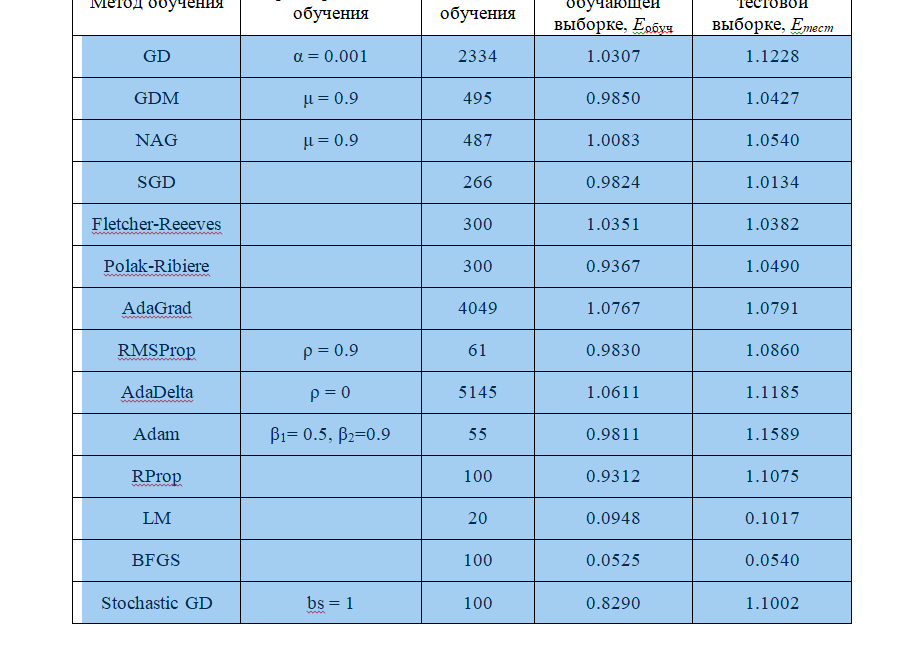

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

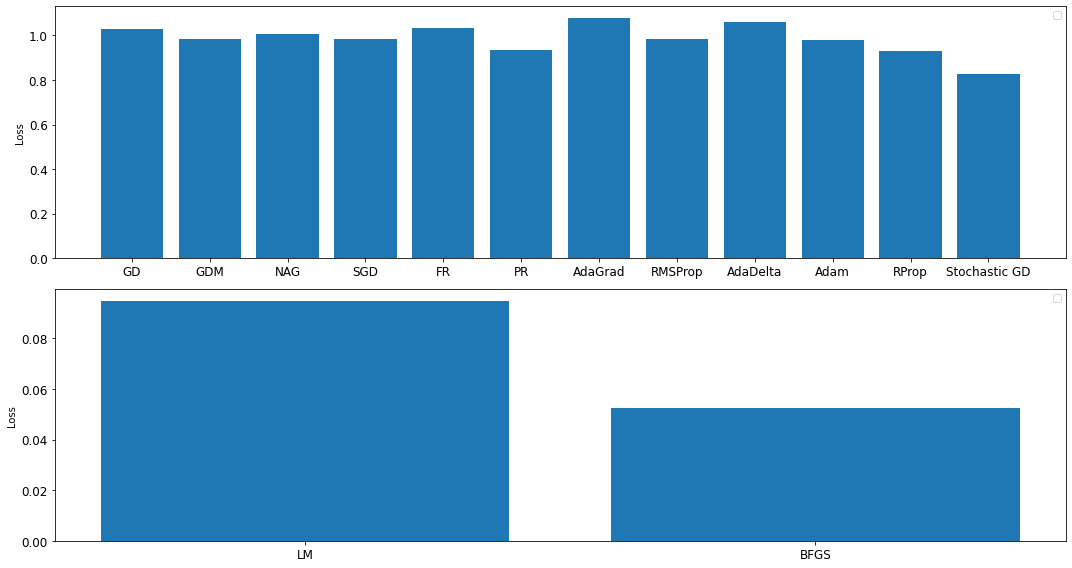

In [ ]:
# plt.clf()
# plt.figure(figsize=(15, 8))

# fontsize = 10
# tick_labelsize = 12

# plt.subplot(2, 1, 1)
# meth = ['GD', 'GDM', 'NAG', 'SGD', 'FR', 'PR', 'AdaGrad' ,'RMSProp', 'AdaDelta', 'Adam', 'RProp', 'Stochastic GD']
# ep = [1.0307, 0.9850, 1.0083, 0.9824, 1.0351, 0.9367, 1.0767, 0.9830, 1.0611, 0.9811, 0.9312,  0.8290]
# plt.bar(meth, ep)
# plt.ylabel('Loss')

# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)

# plt.subplot(2, 1, 2)
# meth1 = ['LM', 'BFGS']
# ep1 = [0.0948, 0.0525]
# plt.bar(meth1, ep1)
# plt.ylabel('Loss')

# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)

# plt.tight_layout()

# plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

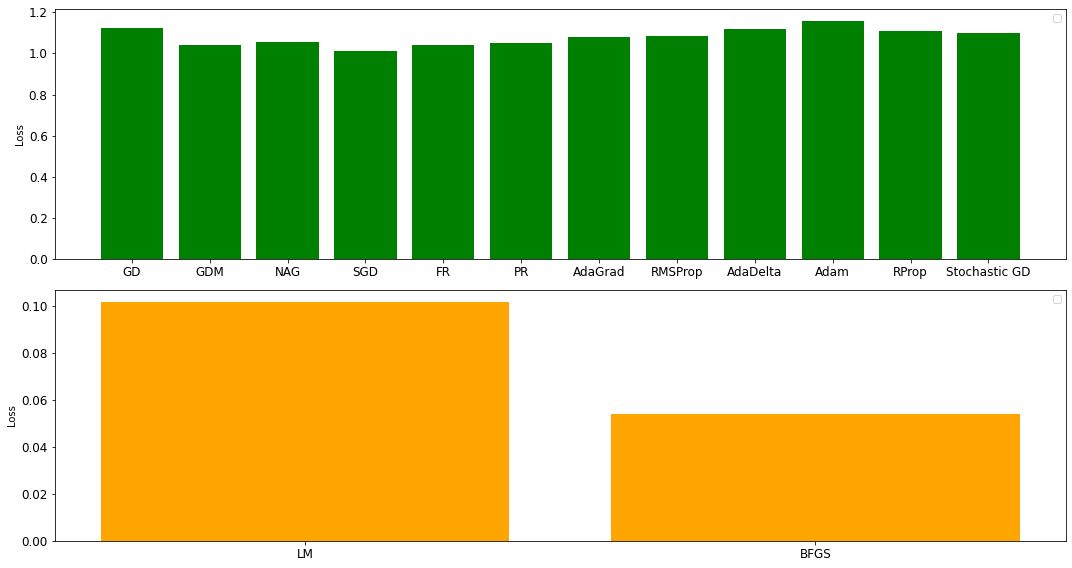

In [ ]:
# plt.clf()
# plt.figure(figsize=(15, 8))

# fontsize = 10
# tick_labelsize = 12

# plt.subplot(2, 1, 1)
# meth = ['GD', 'GDM', 'NAG', 'SGD', 'FR', 'PR', 'AdaGrad' ,'RMSProp', 'AdaDelta', 'Adam', 'RProp', 'Stochastic GD']
# ep = [1.1228, 1.0427, 1.0540, 1.0134, 1.0382, 1.0490, 1.0791, 1.0860, 1.1185, 1.1589, 1.1075, 1.1002]
# plt.bar(meth, ep, color='g')
# plt.ylabel('Loss')

# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)

# plt.subplot(2, 1, 2)
# meth1 = ['LM', 'BFGS']
# ep1 = [0.1017, 0.0540,]
# plt.bar(meth1, ep1, color='orange')
# plt.ylabel('Loss')

# plt.tick_params(labelsize=tick_labelsize) 
# plt.legend(fontsize=fontsize)

# plt.tight_layout()

# plt.show()